In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_yellowcab = pd.read_csv('./Yellowcab.csv')
df_city = pd.read_csv('./City.csv')

In [3]:
df_yellowcab

Unnamed: 0  Transaction ID Date of Travel     Company        City  \
0                0        10000384     2016-01-02  Yellow Cab  ATLANTA GA   
1                1        10085826     2016-10-08  Yellow Cab  ATLANTA GA   
2                2        10254432     2017-11-11  Yellow Cab  ATLANTA GA   
3                3        10420933     2018-12-06  Yellow Cab  ATLANTA GA   
4                4        10000385     2016-01-09  Yellow Cab  ATLANTA GA   
...            ...             ...            ...         ...         ...   
274676      274676        10439838     2018-01-04  Yellow Cab   TUCSON AZ   
274677      274677        10439840     2018-01-06  Yellow Cab   TUCSON AZ   
274678      274678        10439841     2018-01-03  Yellow Cab   TUCSON AZ   
274679      274679        10439843     2018-12-31  Yellow Cab   TUCSON AZ   
274680      274680        10439846     2018-01-04  Yellow Cab   TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip  Customer ID Payment_Mode  \
0              33.93        1341.17      464.1624        27602         Card   
1              48.00         745.83      685.4400        27602         Cash   
2              36.10         536.66      459.1920        27602         Cash   
3               7.98         154.34      107.2512        27602         Cash   
4              42.18        1412.06      516.2832        27594         Cash   
...              ...            ...           ...          ...          ...   
274676         19.00         303.77      232.5600        41414         Card   
274677          5.60          92.42       70.5600        41677         Cash   
274678         26.64         430.50      383.6160        41155         Cash   
274679          6.42         116.99       90.1368        40467         Cash   
274680         13.30         244.65      180.3480        39761         Card   

        Gender  Age  Income (USD/Month)  
0         Male   23                8542  
1         Male   23                8542  
2         Male   23                8542  
3         Male   23                8542  
4         Male   28                3901  
...        ...  ...                 ...  
274676    Male   38                3960  
274677    Male   23               19454  
274678    Male   31               17284  
274679  Female   41               14165  
274680  Female   32               10128  

[274681 rows x 13 columns]

In [4]:
df_yellowcab.drop('Unnamed: 0', axis=1, inplace=True)
df_yellowcab.rename(columns={'Date of Travel':'Date', 'KM Travelled':'KM_Travel','Cost of Trip':'Cost_Trip','Income (USD/Month)':'Income'}, inplace=True)

In [5]:
df_yellowcab.describe()

Transaction ID      KM_Travel  Price Charged      Cost_Trip  \
count    2.746810e+05  274681.000000  274681.000000  274681.000000   
mean     1.021978e+07      22.569517     458.181990     297.922004   
std      1.269829e+05      12.234298     288.386166     162.548986   
min      1.000038e+07       1.900000      20.730000      22.800000   
25%      1.011084e+07      11.990000     226.680000     158.400000   
50%      1.021987e+07      22.440000     425.060000     295.596000   
75%      1.032939e+07      32.960000     633.880000     432.432000   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age         Income  
count  274681.000000  274681.000000  274681.000000  
mean    19428.831732      35.341112   15045.669817  
std     21830.791423      12.578625    7962.727062  
min         1.000000      18.000000    2000.000000  
25%      2403.000000      25.000000    8439.000000  
50%      6445.000000      33.000000   14676.000000  
75%     38916.000000      42.000000   21023.000000  
max     60000.000000      65.000000   34996.000000

In [6]:
df_num = df_yellowcab.select_dtypes(include=np.number)
df_num

Transaction ID  KM_Travel  Price Charged  Cost_Trip  Customer ID  Age  \
0             10000384      33.93        1341.17   464.1624        27602   23   
1             10085826      48.00         745.83   685.4400        27602   23   
2             10254432      36.10         536.66   459.1920        27602   23   
3             10420933       7.98         154.34   107.2512        27602   23   
4             10000385      42.18        1412.06   516.2832        27594   28   
...                ...        ...            ...        ...          ...  ...   
274676        10439838      19.00         303.77   232.5600        41414   38   
274677        10439840       5.60          92.42    70.5600        41677   23   
274678        10439841      26.64         430.50   383.6160        41155   31   
274679        10439843       6.42         116.99    90.1368        40467   41   
274680        10439846      13.30         244.65   180.3480        39761   32   

        Income  
0         8542  
1         8542  
2         8542  
3         8542  
4         3901  
...        ...  
274676    3960  
274677   19454  
274678   17284  
274679   14165  
274680   10128  

[274681 rows x 7 columns]

In [7]:
df_num['Kurtosis'] = df_num.kurtosis(axis=1)
df_num['Skewness'] = df_num.skew(axis=1)
df_num.describe()

Transaction ID      KM_Travel  Price Charged      Cost_Trip  \
count    2.746810e+05  274681.000000  274681.000000  274681.000000   
mean     1.021978e+07      22.569517     458.181990     297.922004   
std      1.269829e+05      12.234298     288.386166     162.548986   
min      1.000038e+07       1.900000      20.730000      22.800000   
25%      1.011084e+07      11.990000     226.680000     158.400000   
50%      1.021987e+07      22.440000     425.060000     295.596000   
75%      1.032939e+07      32.960000     633.880000     432.432000   
max      1.044011e+07      48.000000    2048.030000     691.200000   

         Customer ID            Age         Income       Kurtosis  \
count  274681.000000  274681.000000  274681.000000  274681.000000   
mean    19428.831732      35.341112   15045.669817       6.999787   
std     21830.791423      12.578625    7962.727062       0.000241   
min         1.000000      18.000000    2000.000000       6.999142   
25%      2403.000000      25.000000    8439.000000       6.999656   
50%      6445.000000      33.000000   14676.000000       6.999906   
75%     38916.000000      42.000000   21023.000000       6.999967   
max     60000.000000      65.000000   34996.000000       6.999999   

            Skewness  
count  274681.000000  
mean        2.828372  
std         0.000062  
min         2.828202  
25%         2.828337  
50%         2.828403  
75%         2.828419  
max         2.828427

In [8]:
df_city

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [9]:
df_city.dtypes

City          object
Population    object
Users         object
dtype: object

In [10]:
# Converting Objects to Intenger
df_city['Population'] = df_city['Population'].str.replace(',','')
df_city['Users'] = df_city['Users'].str.replace(',','')
df_city['Population'] = df_city['Population'].astype(int)
df_city['Users'] = df_city['Users'].astype(int)

In [11]:
df_city['Avg_Users'] = round(df_city['Users'] / df_city['Population'] * 100 , 1)

In [12]:
df_city

City  Population   Users  Avg_Users
0        NEW YORK NY     8405837  302149        3.6
1         CHICAGO IL     1955130  164468        8.4
2     LOS ANGELES CA     1595037  144132        9.0
3           MIAMI FL     1339155   17675        1.3
4     SILICON VALLEY     1177609   27247        2.3
5      ORANGE COUNTY     1030185   12994        1.3
6       SAN DIEGO CA      959307   69995        7.3
7         PHOENIX AZ      943999    6133        0.6
8          DALLAS TX      942908   22157        2.3
9         ATLANTA GA      814885   24701        3.0
10         DENVER CO      754233   12421        1.6
11         AUSTIN TX      698371   14978        2.1
12        SEATTLE WA      671238   25063        3.7
13         TUCSON AZ      631442    5712        0.9
14  SAN FRANCISCO CA      629591  213609       33.9
15     SACRAMENTO CA      545776    7044        1.3
16     PITTSBURGH PA      542085    3643        0.7
17     WASHINGTON DC      418859  127001       30.3
18      NASHVILLE TN      327225    9270        2.8
19         BOSTON MA      248968   80021       32.1

<AxesSubplot: xlabel='Age', ylabel='Count'>

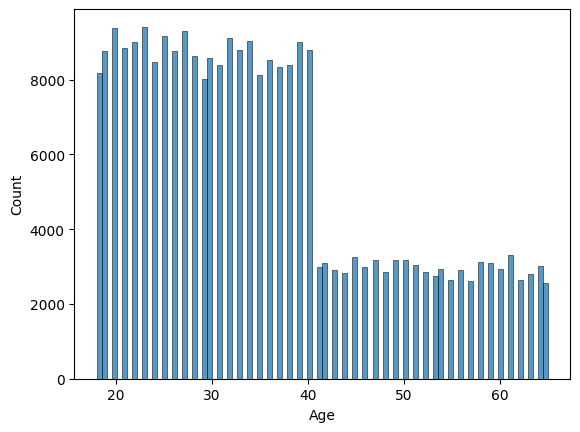

In [13]:
sns.histplot(df_yellowcab.Age)

<AxesSubplot: >

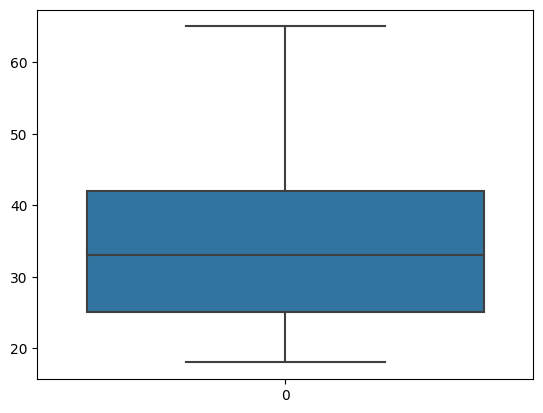

In [14]:
sns.boxplot(df_yellowcab.Age)

<AxesSubplot: xlabel='Price Charged', ylabel='Count'>

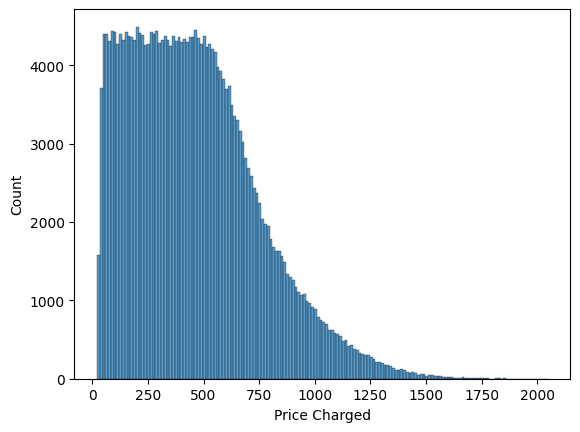

In [15]:
sns.histplot(df_yellowcab['Price Charged'])

<AxesSubplot: >

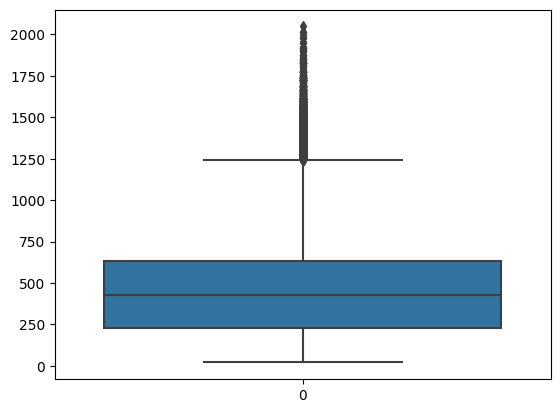

In [16]:
sns.boxplot(df_yellowcab['Price Charged'])

<AxesSubplot: xlabel='Income', ylabel='Count'>

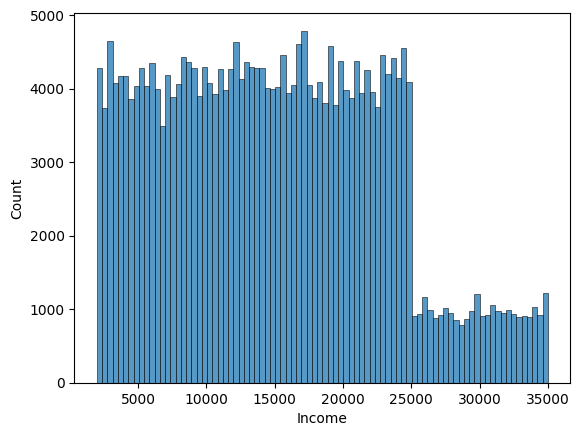

In [17]:
sns.histplot(df_yellowcab.Income)

<AxesSubplot: >

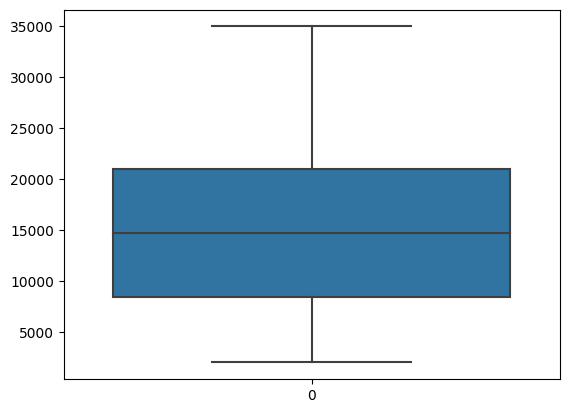

In [18]:
sns.boxplot(df_yellowcab.Income)

<AxesSubplot: xlabel='Cost_Trip', ylabel='Count'>

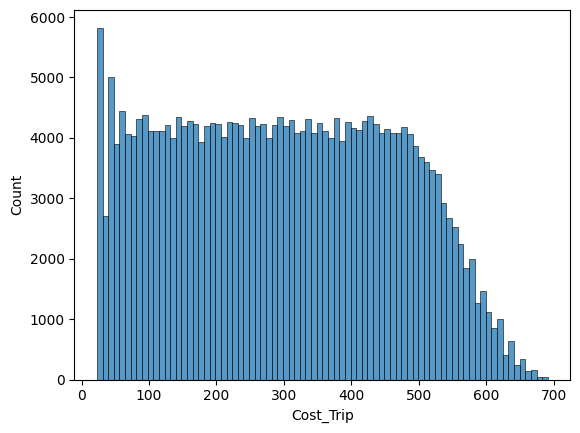

In [19]:
sns.histplot(df_yellowcab.Cost_Trip)

<AxesSubplot: >

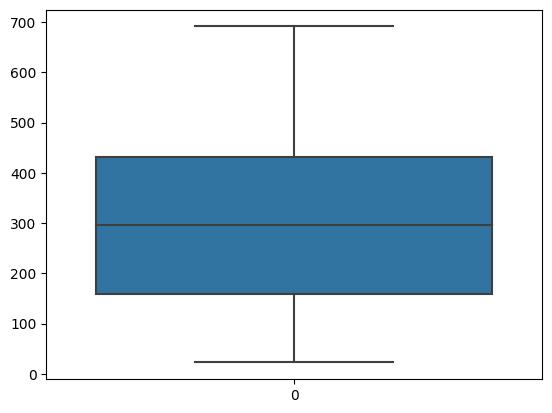

In [20]:
sns.boxplot(df_yellowcab.Cost_Trip)

<AxesSubplot: xlabel='Payment_Mode', ylabel='Count'>

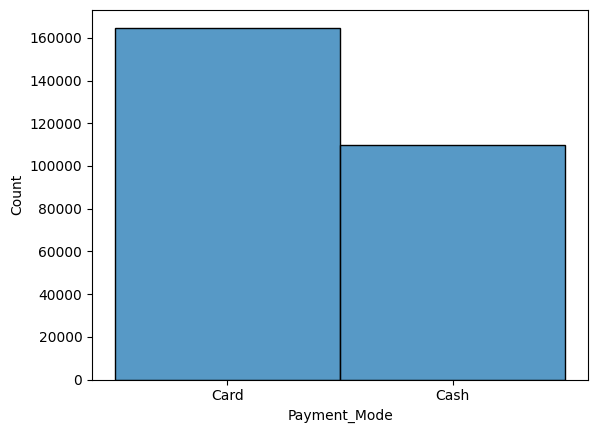

In [21]:
sns.histplot(df_yellowcab.Payment_Mode)

<AxesSubplot: xlabel='Gender', ylabel='Count'>

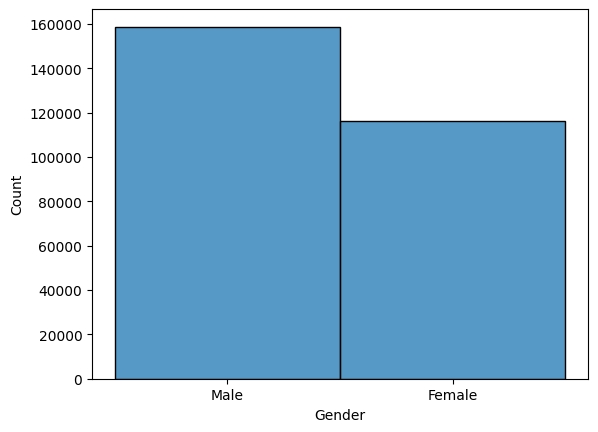

In [22]:
sns.histplot(df_yellowcab.Gender)

<AxesSubplot: xlabel='KM_Travel', ylabel='Count'>

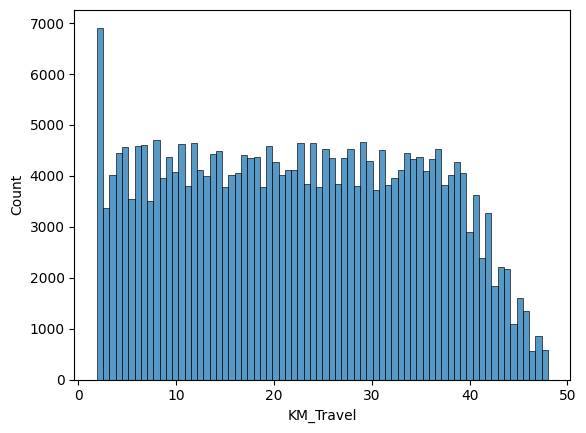

In [23]:
sns.histplot(df_yellowcab.KM_Travel)

<AxesSubplot: >

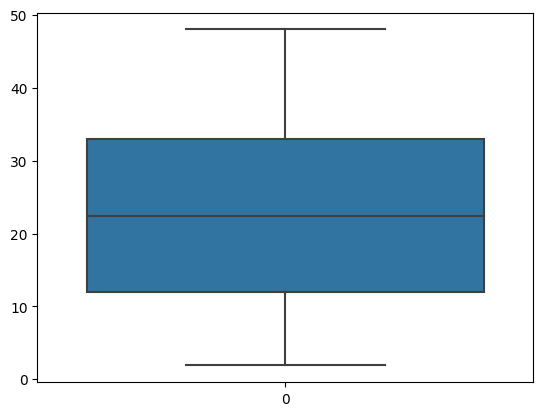

In [24]:
sns.boxplot(df_yellowcab.KM_Travel)

In [25]:
df_yellowcab['Profit'] = df_yellowcab['Price Charged'] - df_yellowcab['Cost_Trip']

<AxesSubplot: xlabel='Profit', ylabel='Count'>

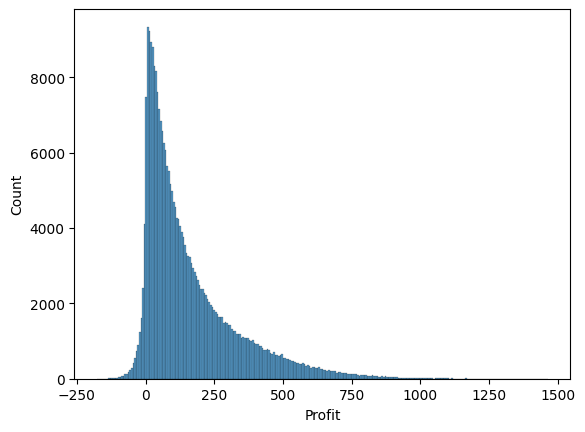

In [26]:
sns.histplot(df_yellowcab.Profit)

<AxesSubplot: >

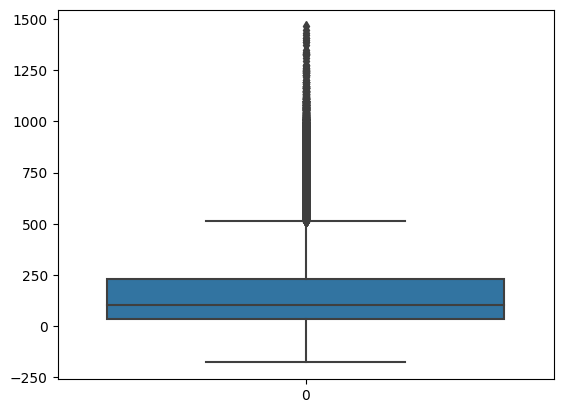

In [27]:
sns.boxplot(df_yellowcab.Profit)

In [28]:
df_yellowcab.Profit.describe()

count    274681.000000
mean        160.259986
std         171.823833
min        -176.930800
25%          37.180000
50%         102.000000
75%         228.670400
max        1463.966000
Name: Profit, dtype: float64

In [29]:
df_yellowcab.corr()

C:\Users\josejesus\AppData\Local\Temp\ipykernel_20836\3257570276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_yellowcab.corr()


Transaction ID  KM_Travel  Price Charged  Cost_Trip  \
Transaction ID        1.000000  -0.002641      -0.058665  -0.002859   
KM_Travel            -0.002641   1.000000       0.859709   0.993390   
Price Charged        -0.058665   0.859709       1.000000   0.853996   
Cost_Trip            -0.002859   0.993390       0.853996   1.000000   
Customer ID          -0.017240   0.000692      -0.208935   0.000617   
Age                  -0.000885   0.000838      -0.002721   0.000946   
Income               -0.000103  -0.000850       0.003818  -0.000768   
Profit               -0.095758   0.503152       0.870485   0.487311   

                Customer ID       Age    Income    Profit  
Transaction ID    -0.017240 -0.000885 -0.000103 -0.095758  
KM_Travel          0.000692  0.000838 -0.000850  0.503152  
Price Charged     -0.208935 -0.002721  0.003818  0.870485  
Cost_Trip          0.000617  0.000946 -0.000768  0.487311  
Customer ID        1.000000 -0.005145 -0.015681 -0.351256  
Age               -0.005145  1.000000  0.001759 -0.005462  
Income            -0.015681  0.001759  1.000000  0.007136  
Profit            -0.351256 -0.005462  0.007136  1.000000

C:\Users\josejesus\AppData\Local\Temp\ipykernel_20836\3808481886.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_yellowcab.corr())


<AxesSubplot: >

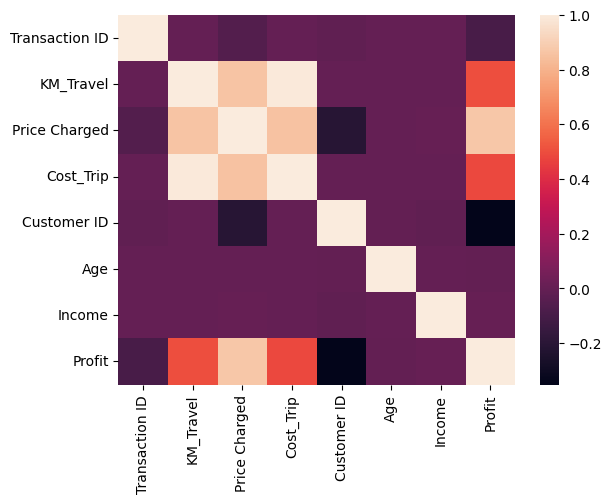

In [30]:
sns.heatmap(df_yellowcab.corr())

In [41]:
df_yellowcab.set_index('Date', inplace=True)
df_yellowcab.index = pd.to_datetime(df_yellowcab.index)
df_yellowcab.sort_index(ascending=True)

Transaction ID     Company            City  KM_Travel  \
Date                                                                
2016-01-02        10000384  Yellow Cab      ATLANTA GA      33.93   
2016-01-02        10001042  Yellow Cab    SAN DIEGO CA      10.78   
2016-01-02        10001043  Yellow Cab    SAN DIEGO CA      15.40   
2016-01-02        10000709  Yellow Cab  LOS ANGELES CA      38.61   
2016-01-02        10001047  Yellow Cab    SAN DIEGO CA      32.10   
...                    ...         ...             ...        ...   
2018-12-31        10434501  Yellow Cab      CHICAGO IL      36.40   
2018-12-31        10435262  Yellow Cab     NEW YORK NY       2.30   
2018-12-31        10437882  Yellow Cab      CHICAGO IL      18.72   
2018-12-31        10434141  Yellow Cab       AUSTIN TX       8.82   
2018-12-31        10434653  Yellow Cab      CHICAGO IL      13.13   

            Price Charged  Cost_Trip  Customer ID Payment_Mode  Gender  Age  \
Date                                                                          
2016-01-02        1341.17   464.1624        27602         Card    Male   23   
2016-01-02         322.26   134.5344        19249         Card    Male   34   
2016-01-02         386.50   206.9760        18510         Card    Male   59   
2016-01-02        1016.46   509.6520         6539         Card    Male   38   
2016-01-02         900.92   442.9800        18898         Card    Male   23   
...                   ...        ...          ...          ...     ...  ...   
2018-12-31         475.51   476.1120         5580         Cash    Male   34   
2018-12-31          57.08    28.4280         1713         Card    Male   28   
2018-12-31         247.24   226.8864         5633         Cash    Male   49   
2018-12-31         145.30   127.0080        34127         Card  Female   25   
2018-12-31         196.03   187.4964         3930         Card    Male   18   

            Income    Profit  
Date                          
2016-01-02    8542  877.0076  
2016-01-02    7894  187.7256  
2016-01-02   20062  179.5240  
2016-01-02    6978  506.8080  
2016-01-02    8092  457.9400  
...            ...       ...  
2018-12-31    4971   -0.6020  
2018-12-31   17517   28.6520  
2018-12-31   23206   20.3536  
2018-12-31   24557   18.2920  
2018-12-31    3509    8.5336  

[274681 rows x 12 columns]

In [42]:
city = df_yellowcab['City'].unique()
city

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [43]:
df_yellowcab.reset_index()
dict_cities = {}
for i in city:
    df_cities = df_yellowcab[df_yellowcab['City'] == i]
    dict_cities[i] = df_cities


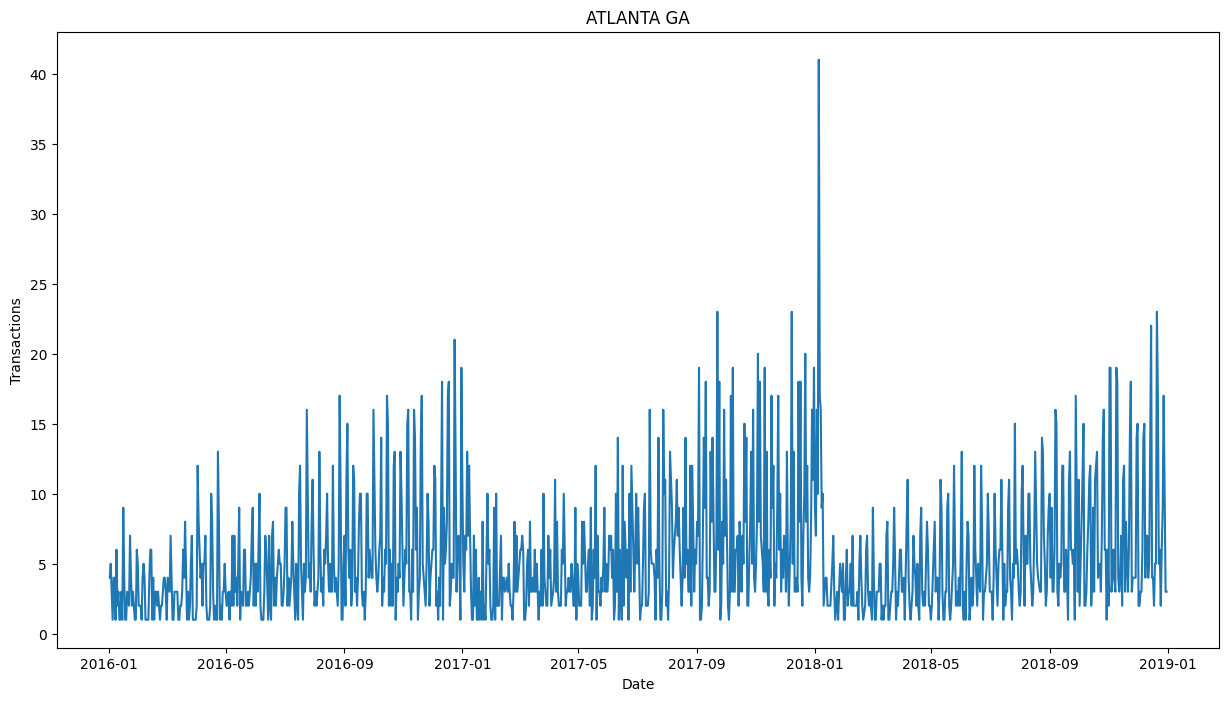

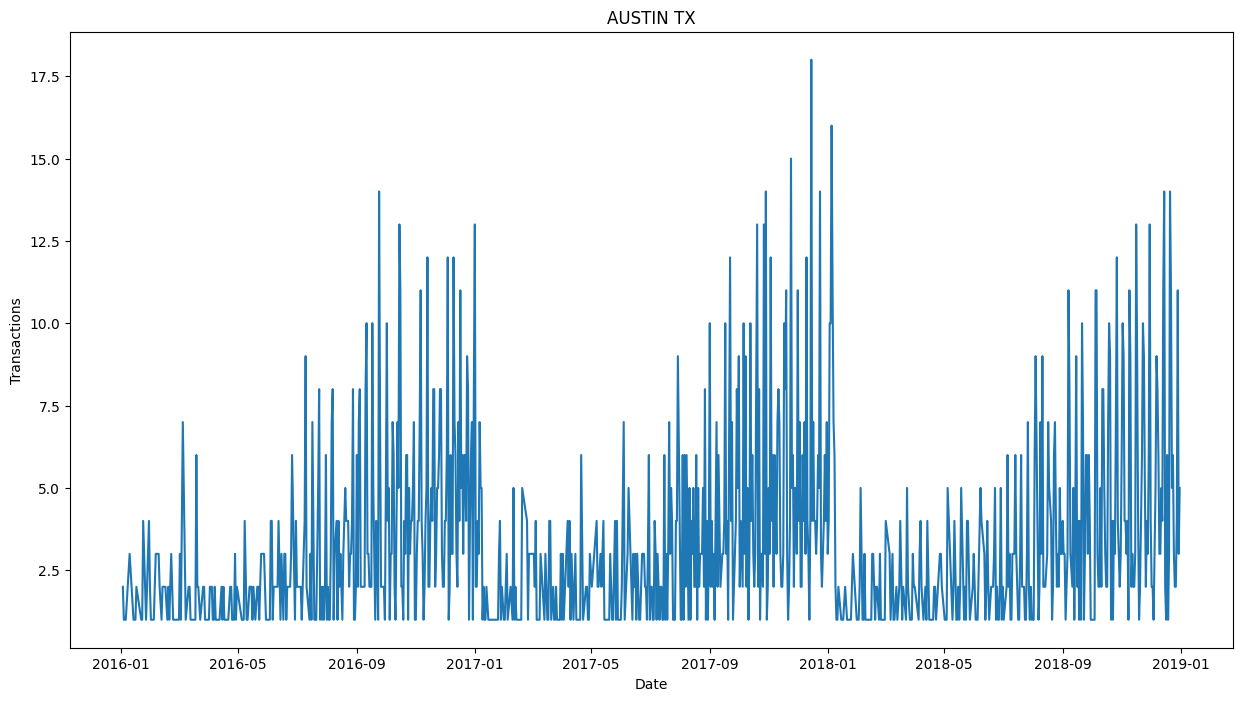

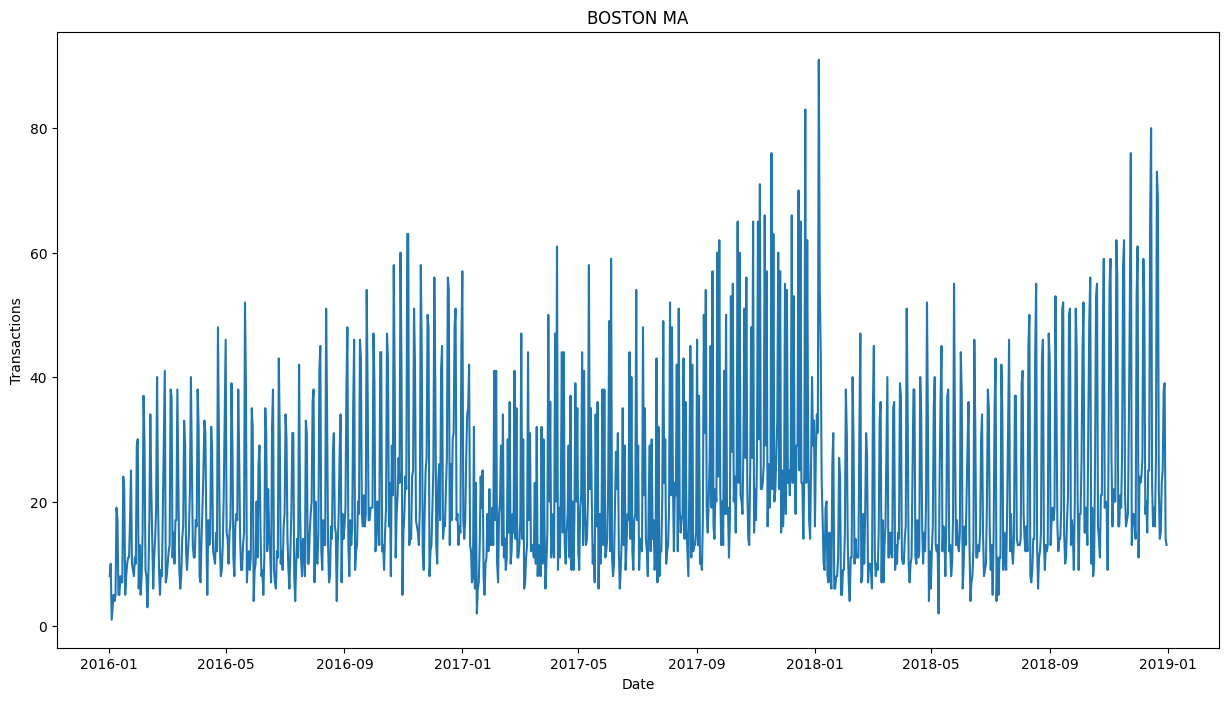

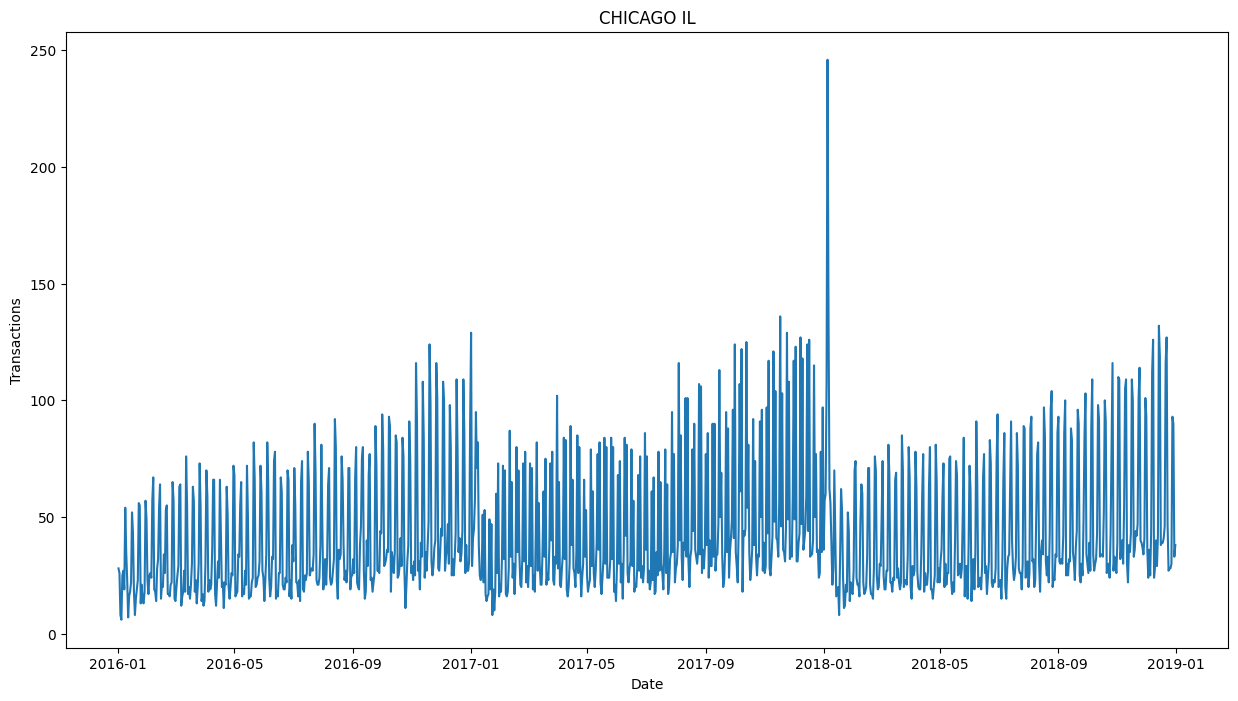

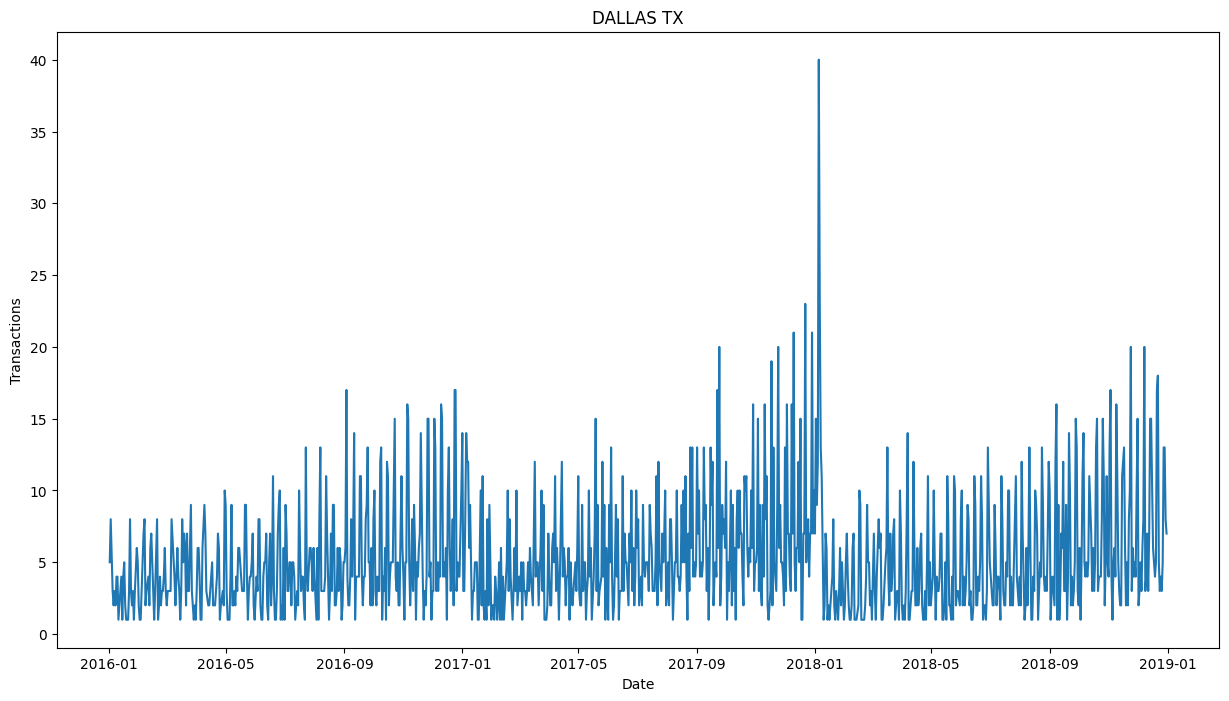

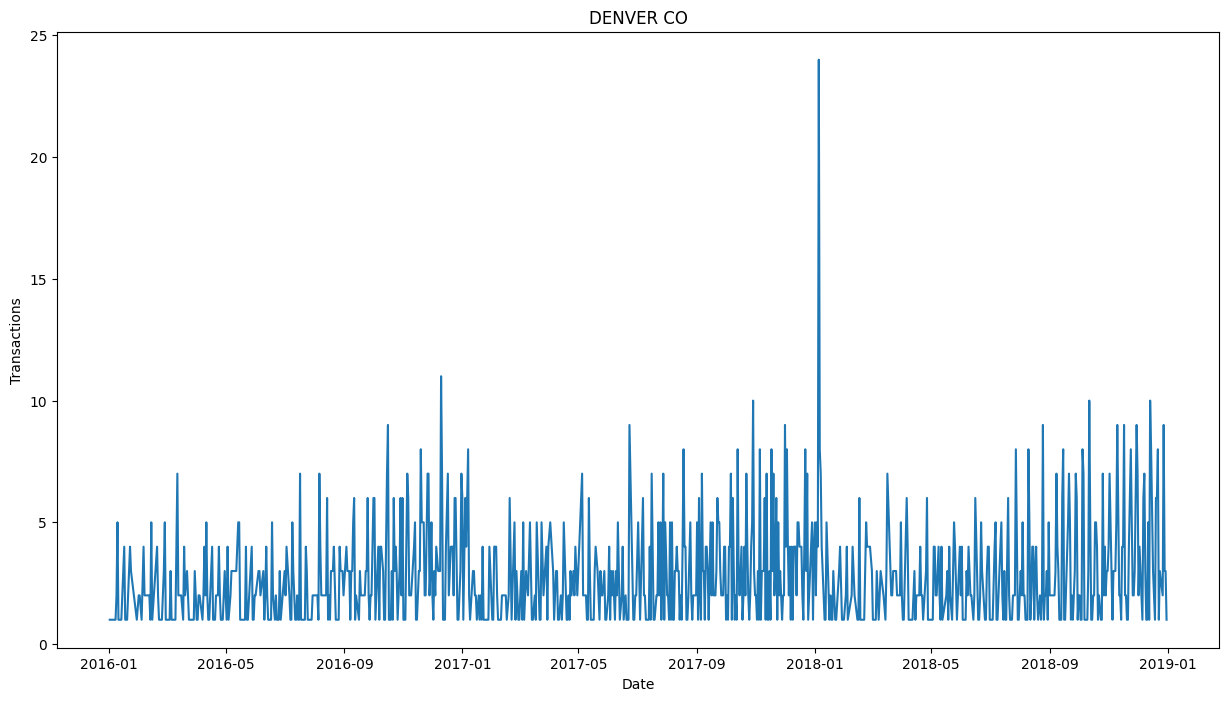

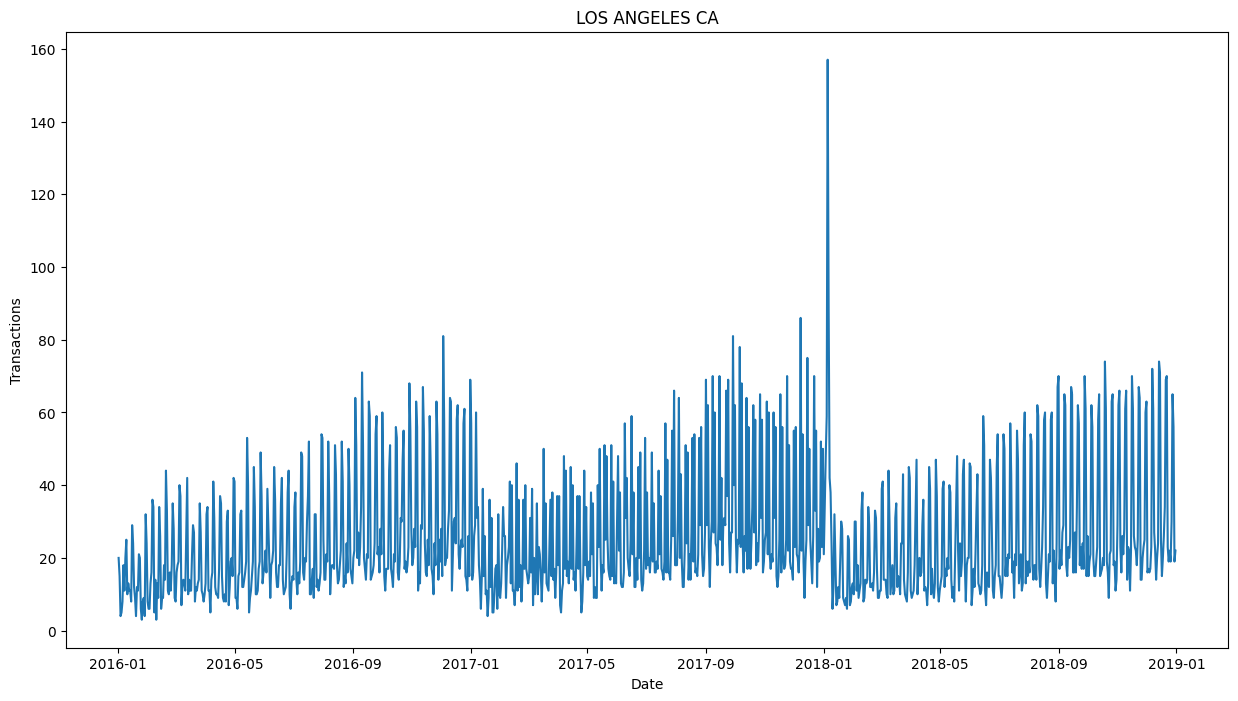

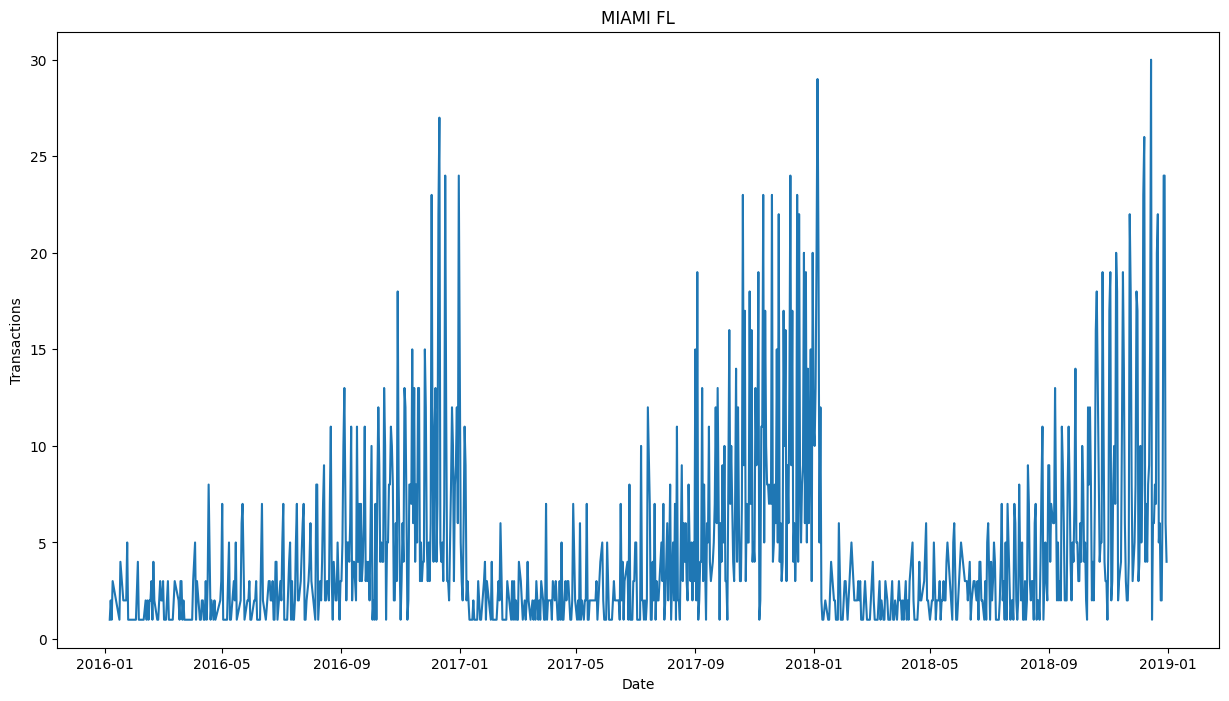

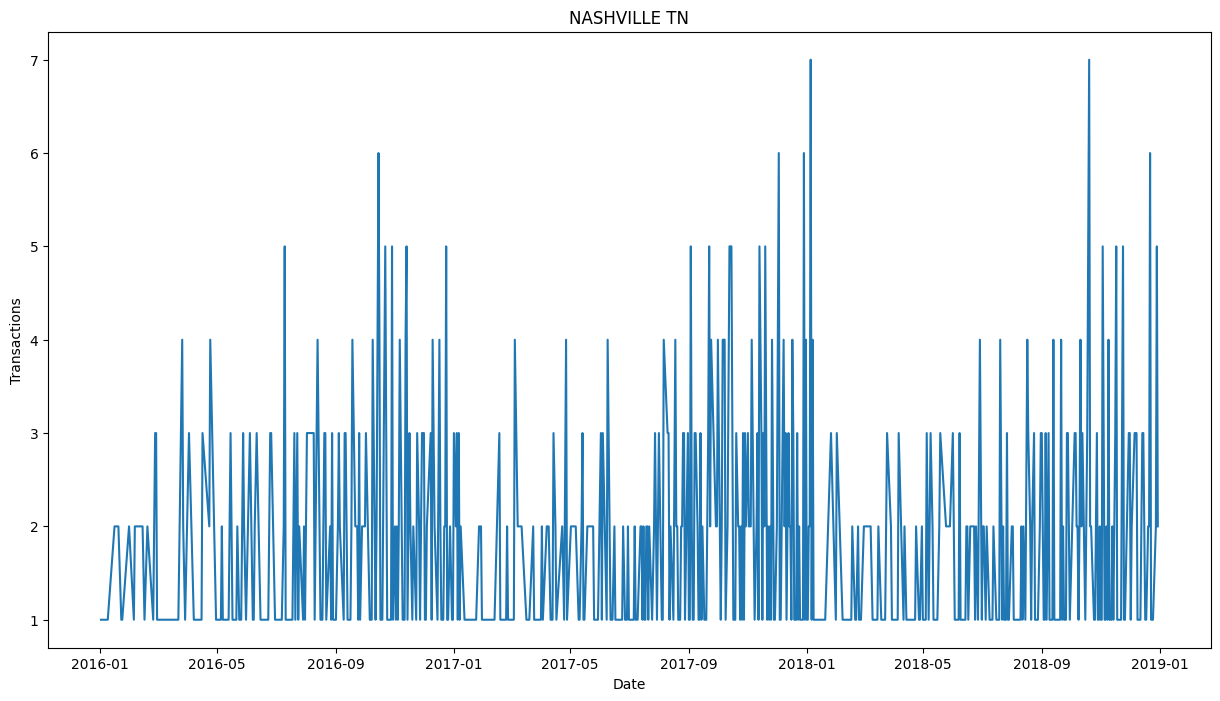

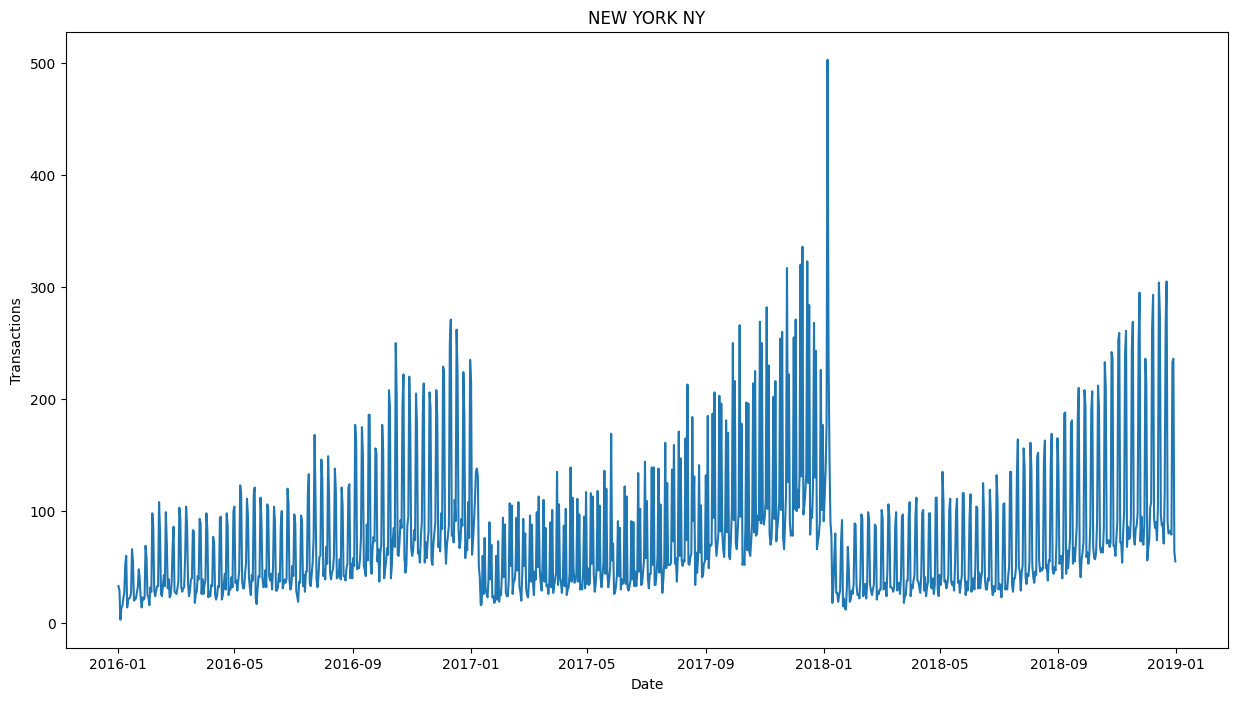

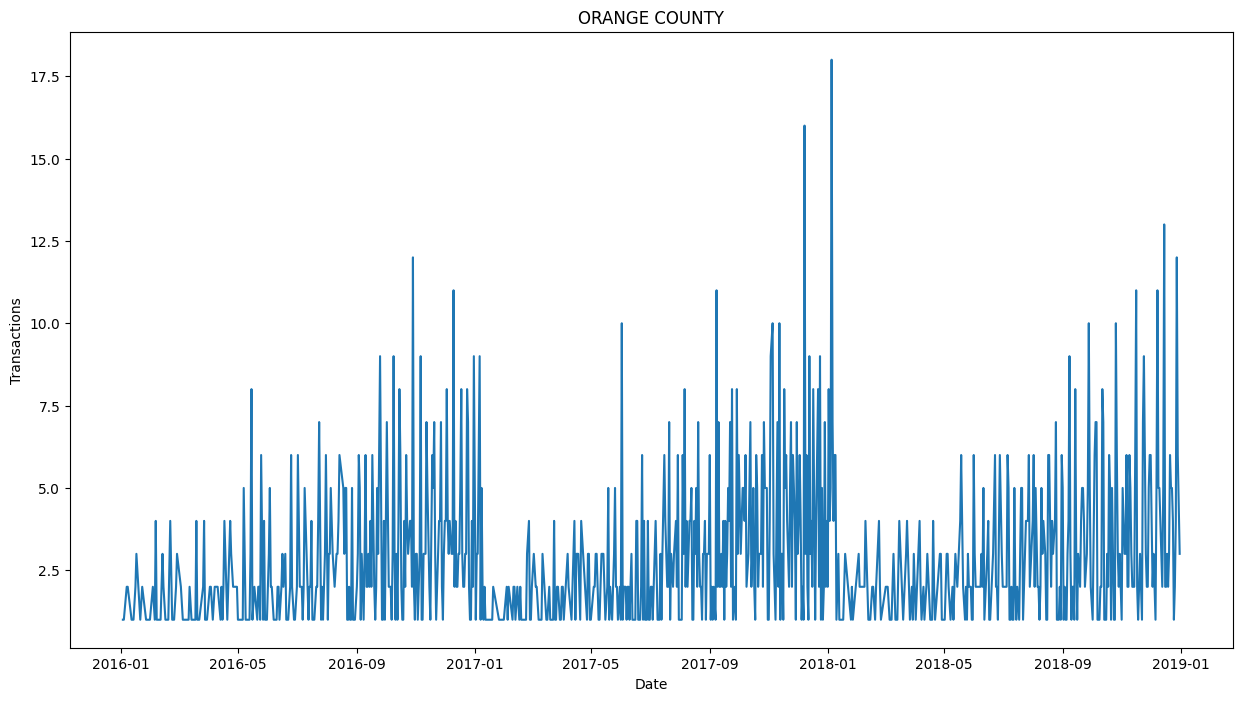

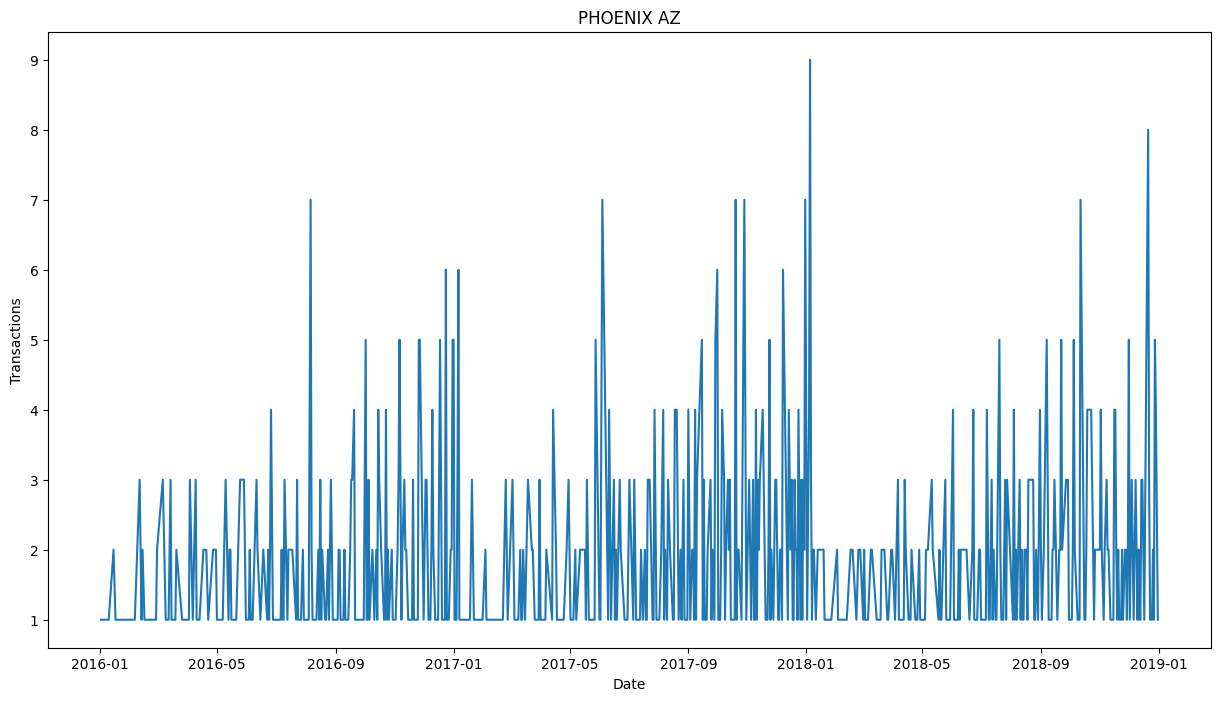

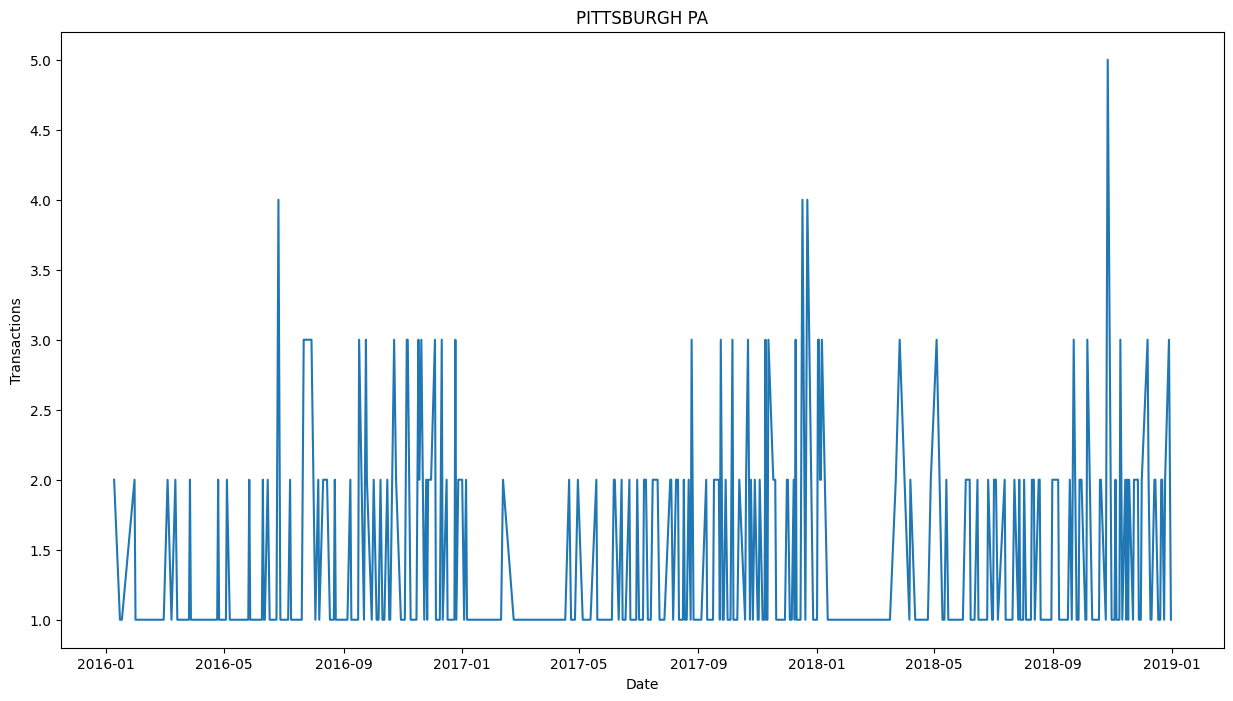

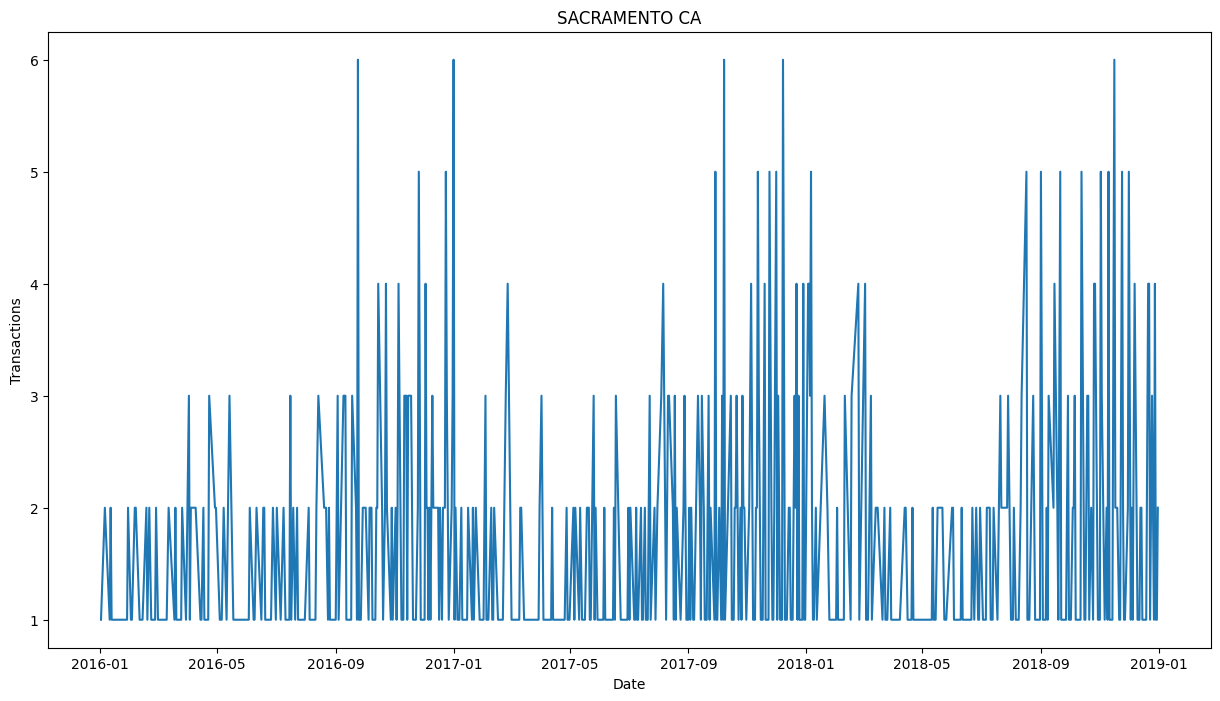

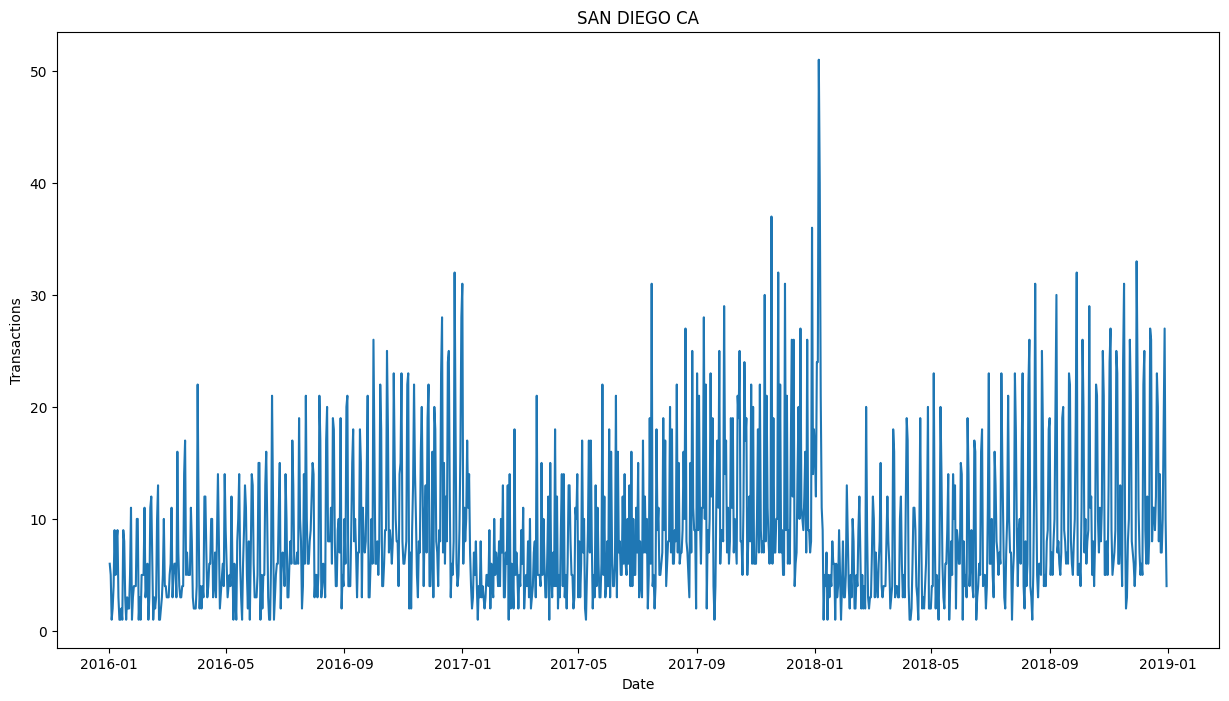

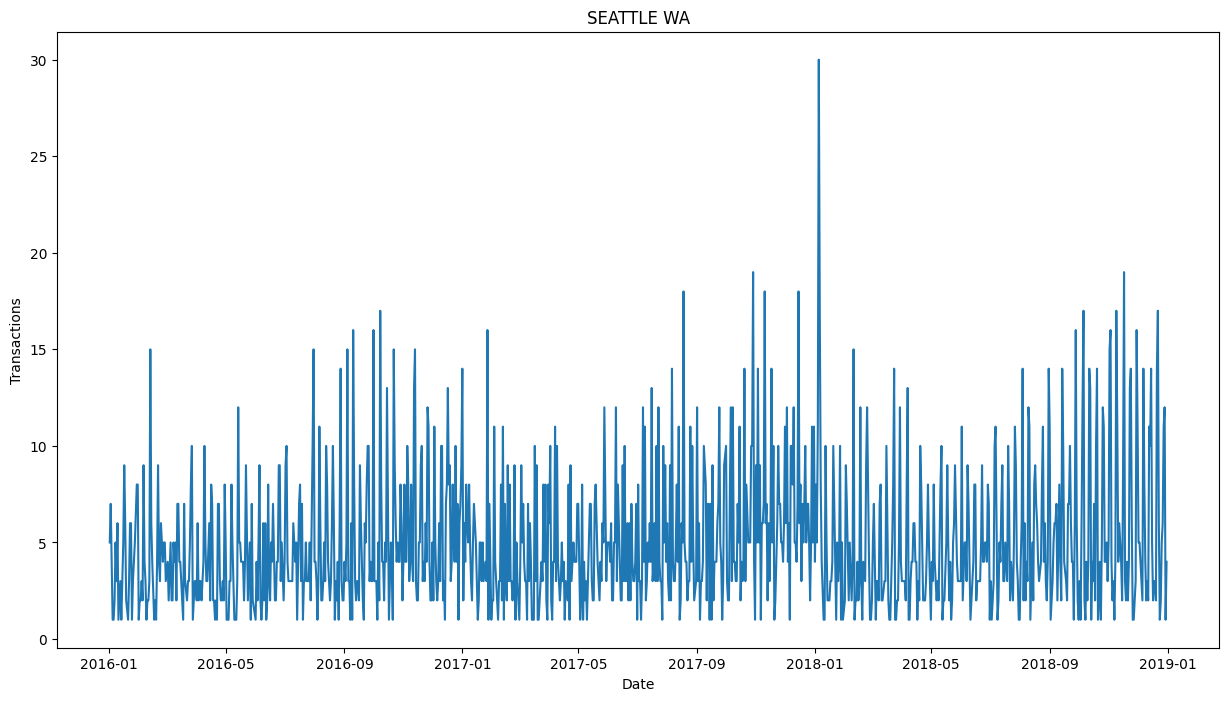

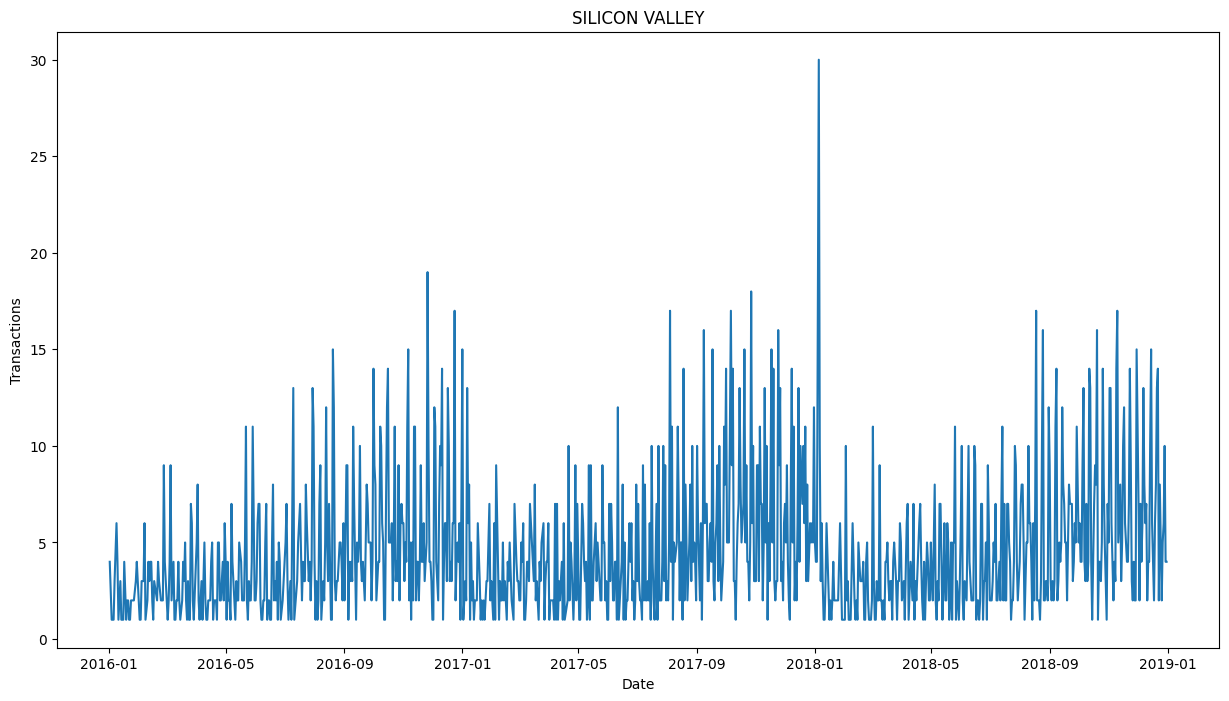

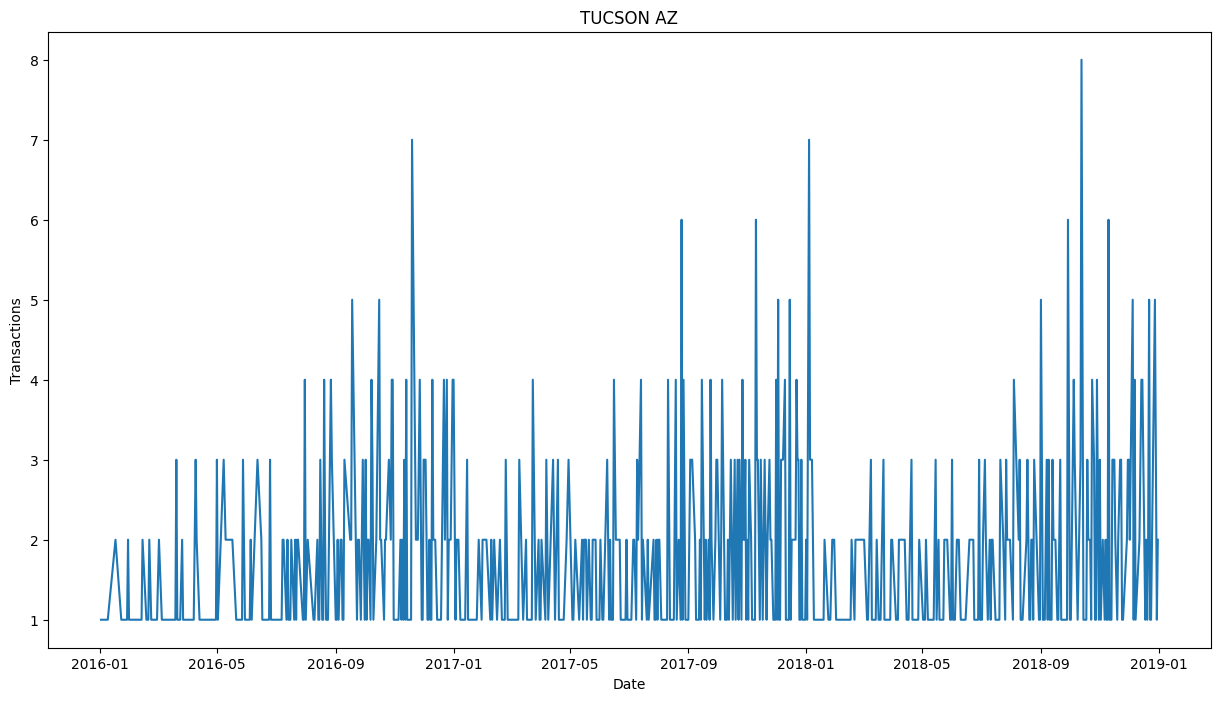

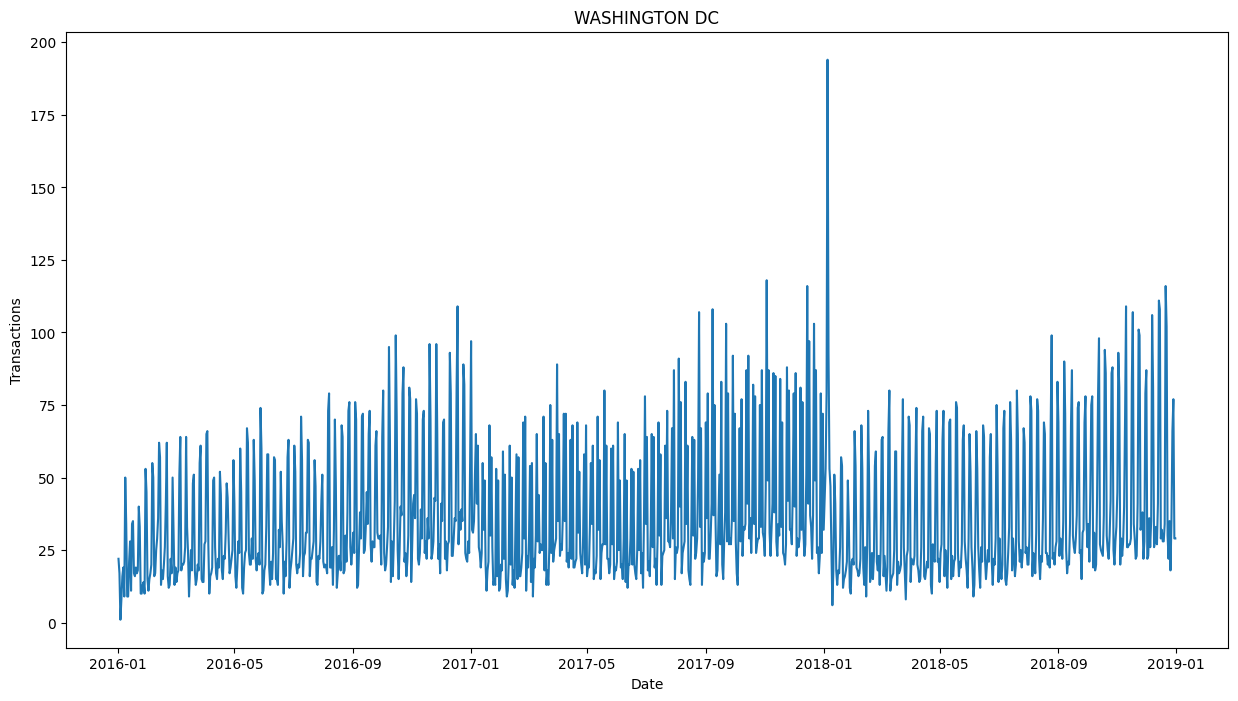

In [44]:
for i in city:
    plt.figure(figsize=(15,8))
    plt.plot(dict_cities[i].groupby(['Date'])['Transaction ID'].count())
    plt.title(i)
    plt.ylabel('Transactions')
    plt.xlabel('Date')

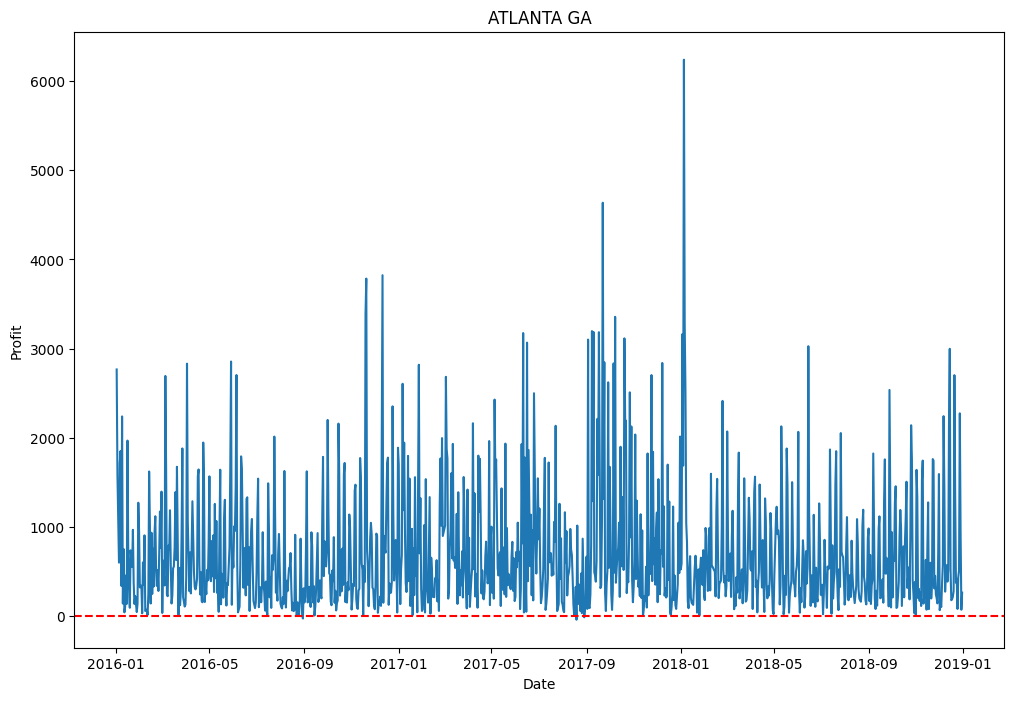

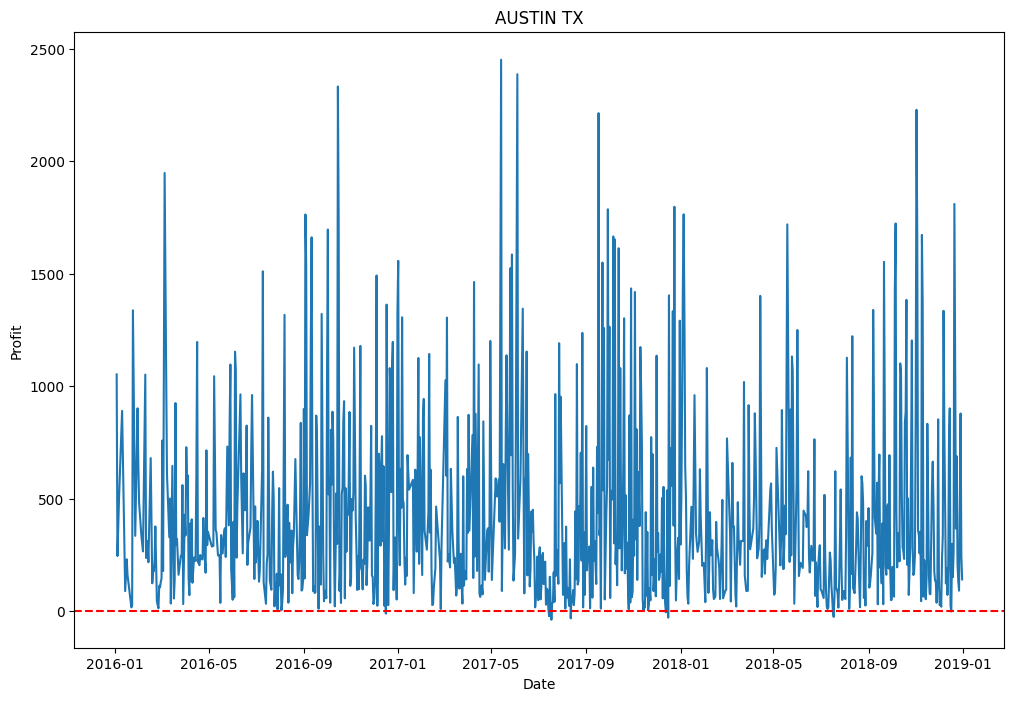

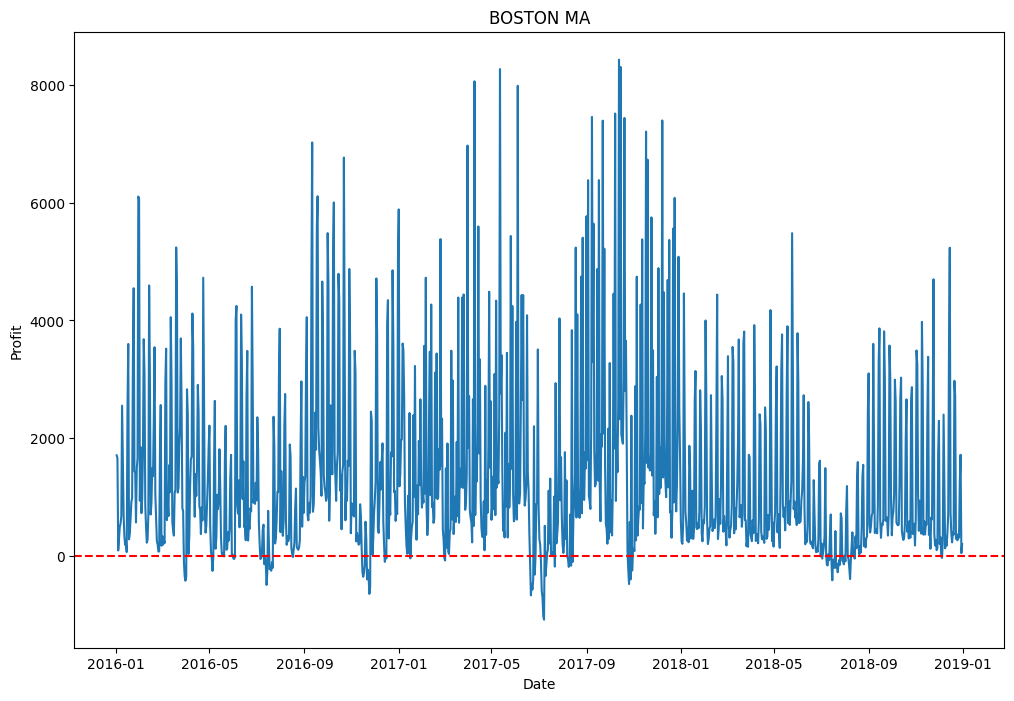

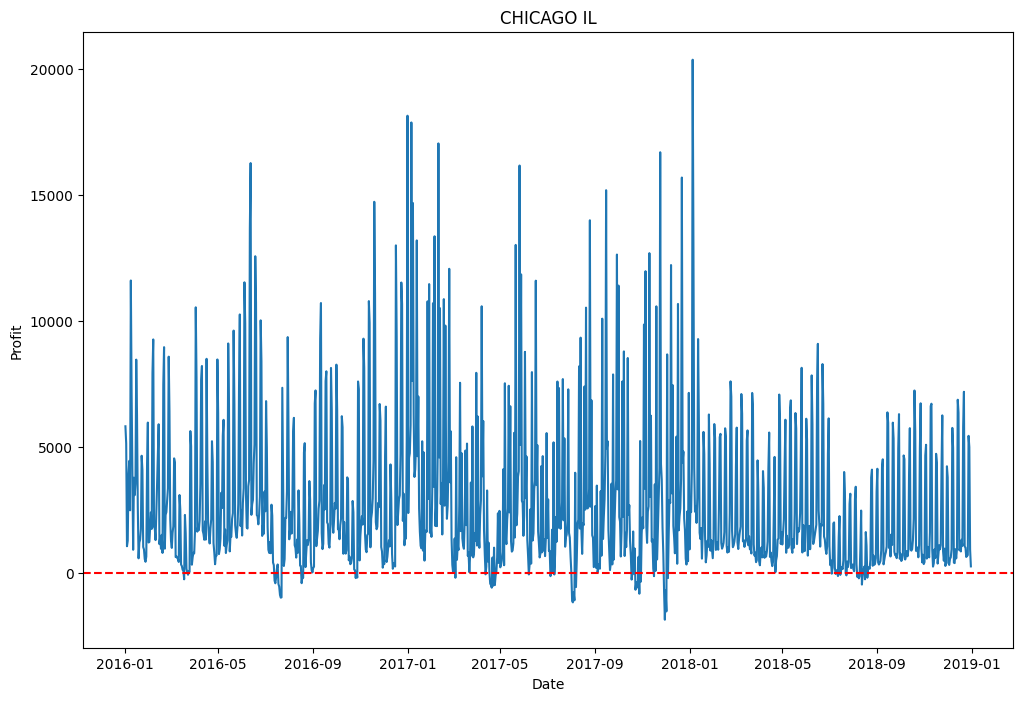

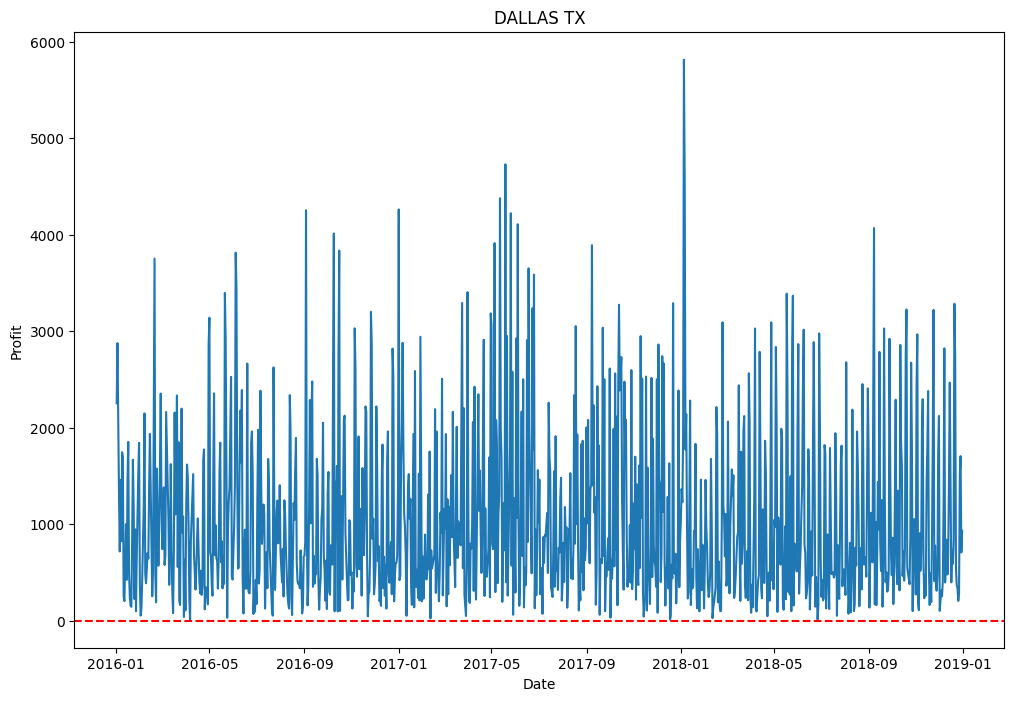

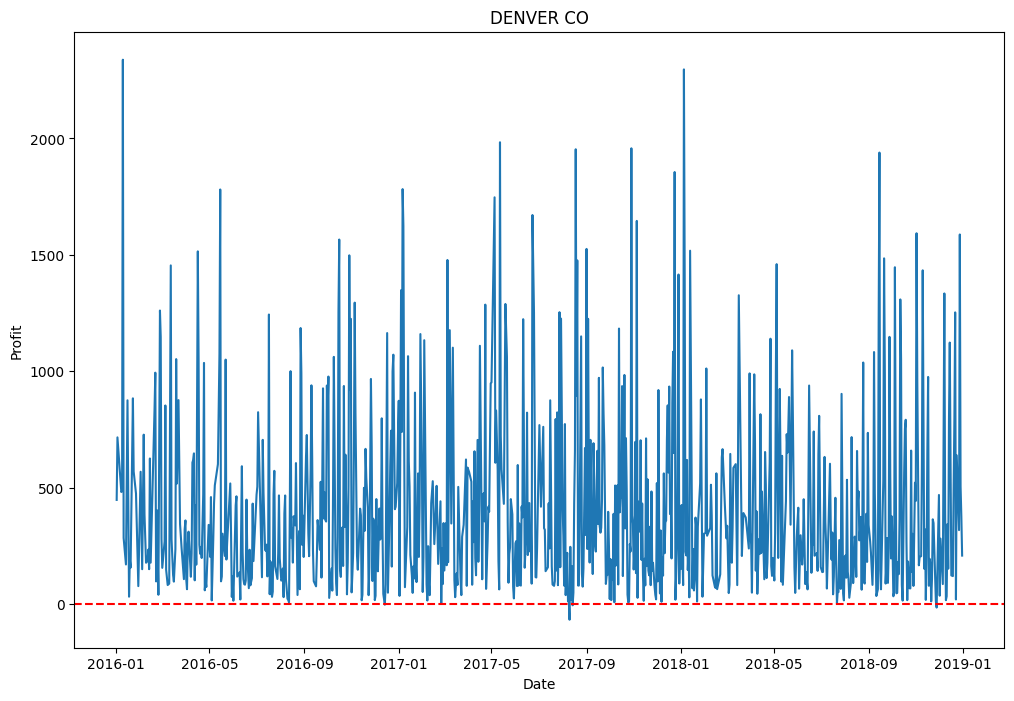

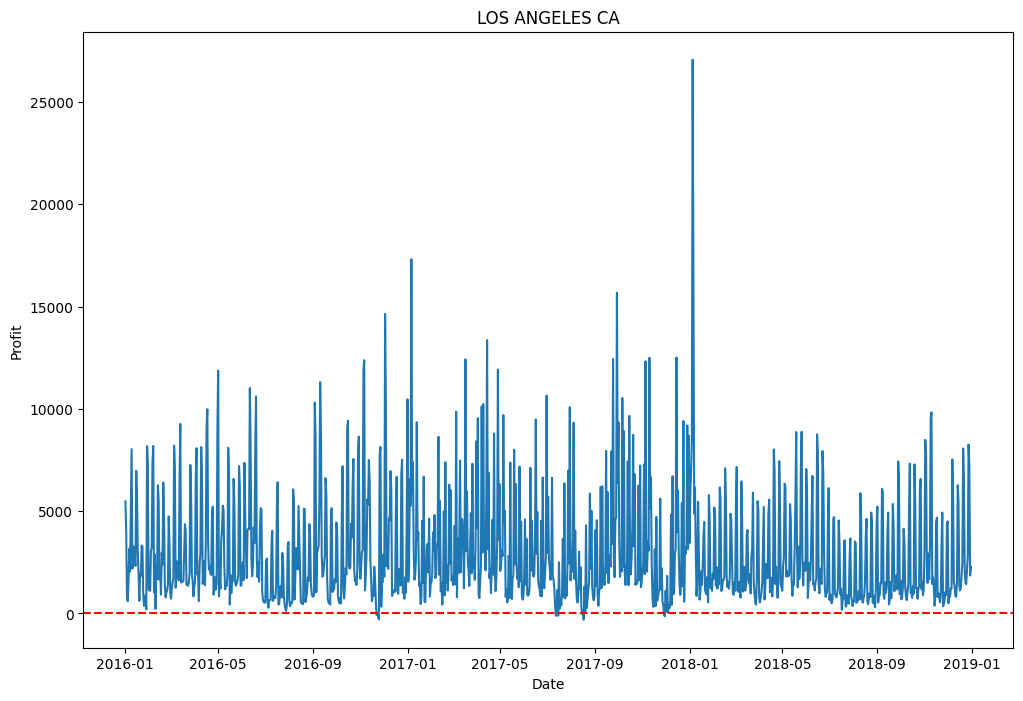

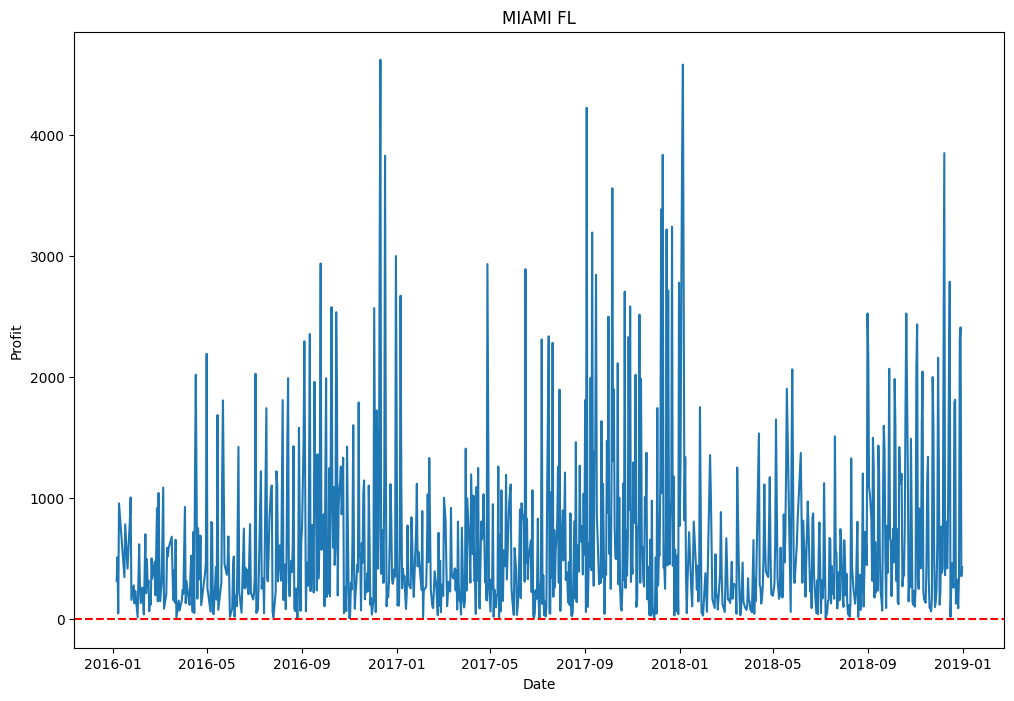

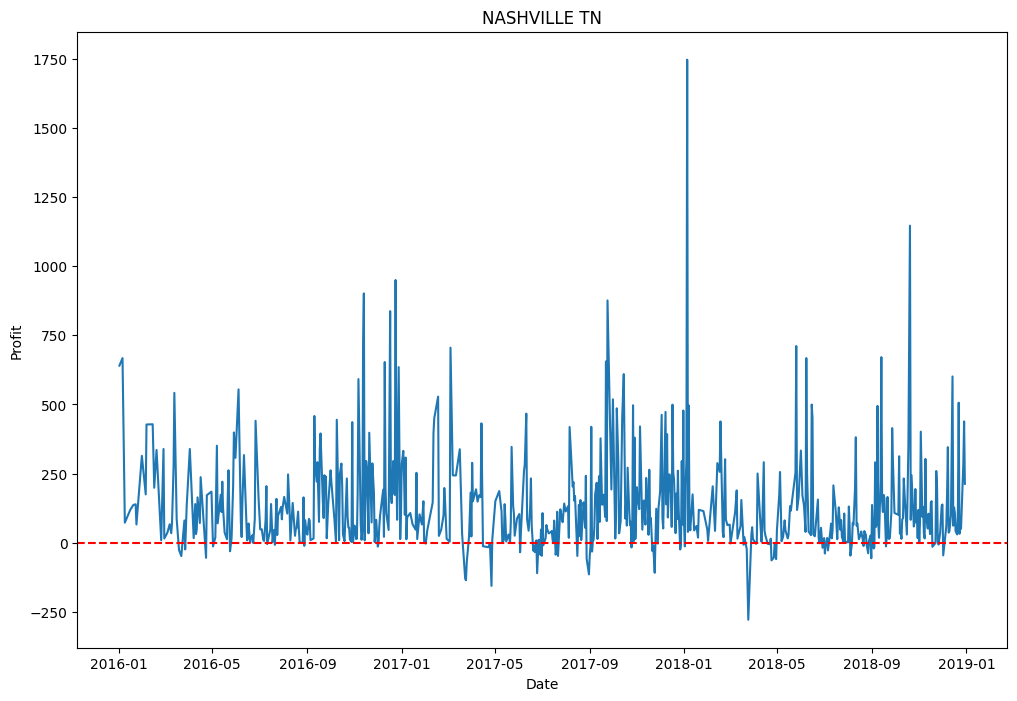

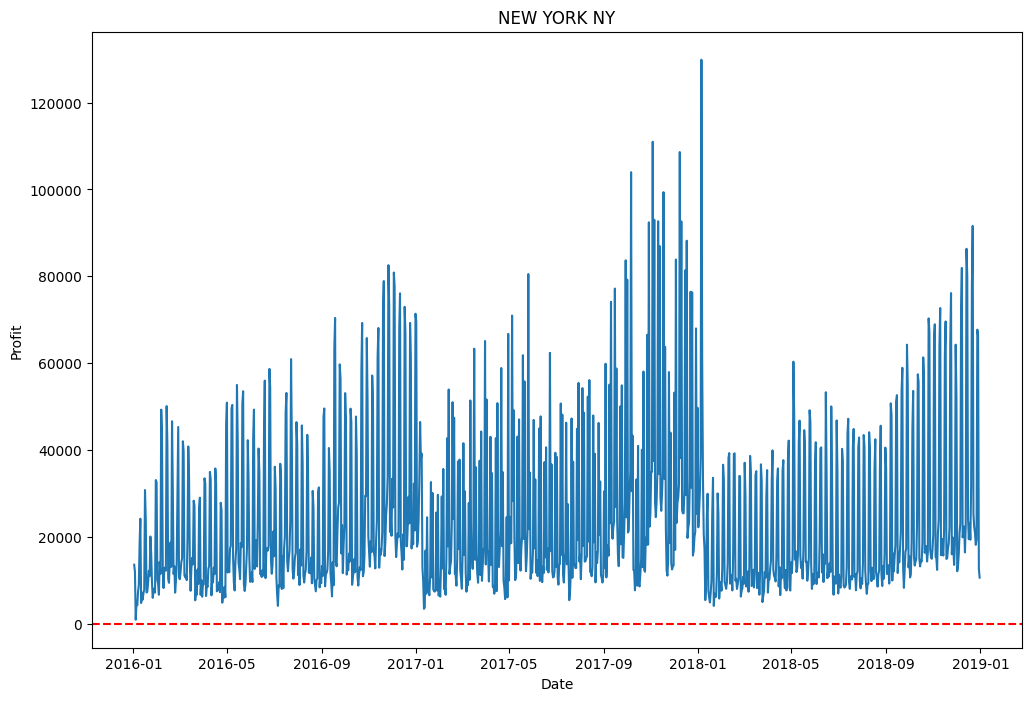

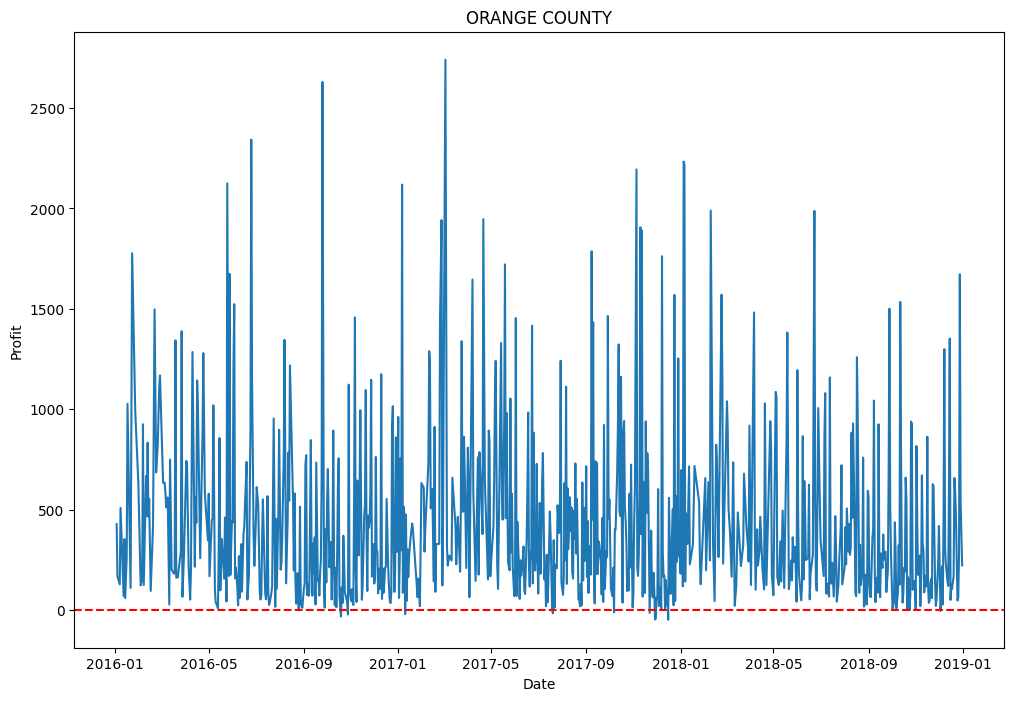

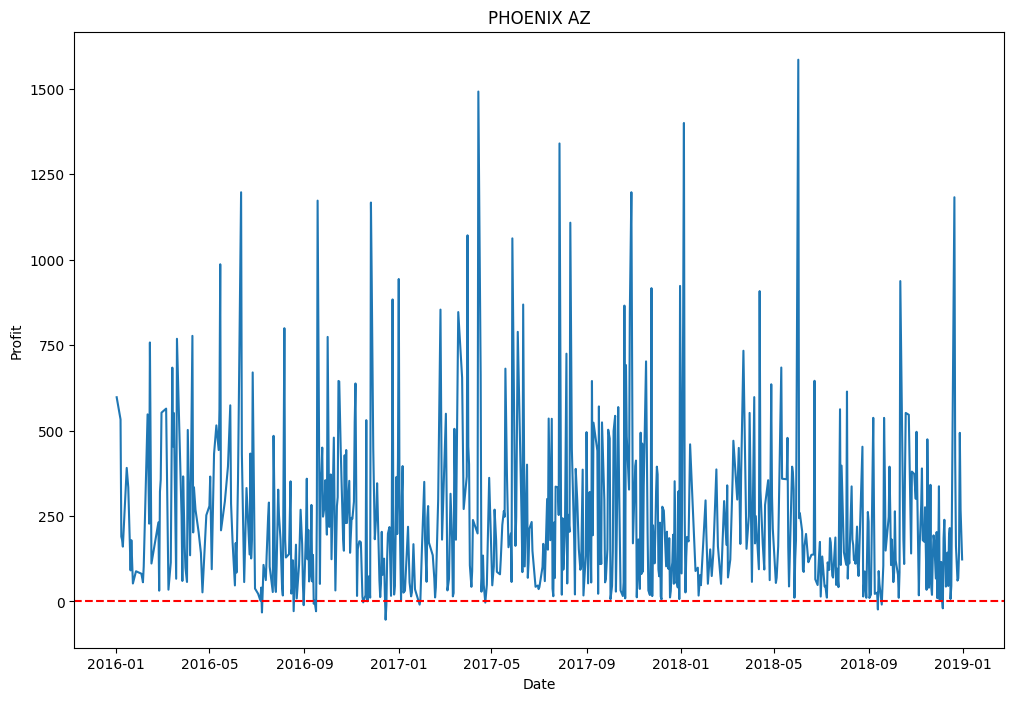

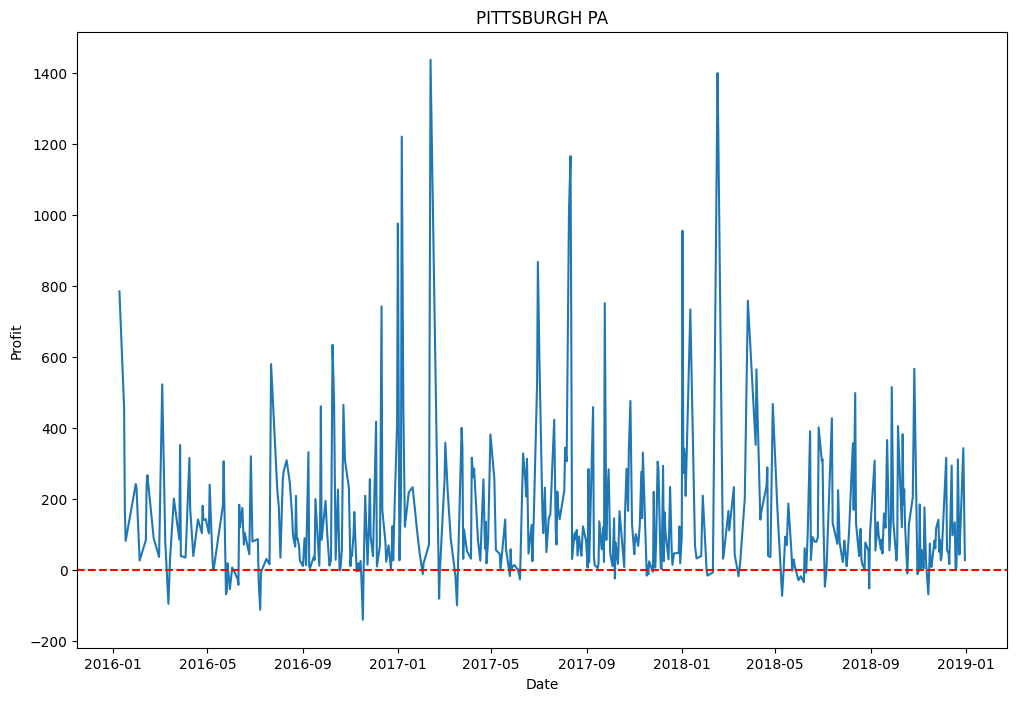

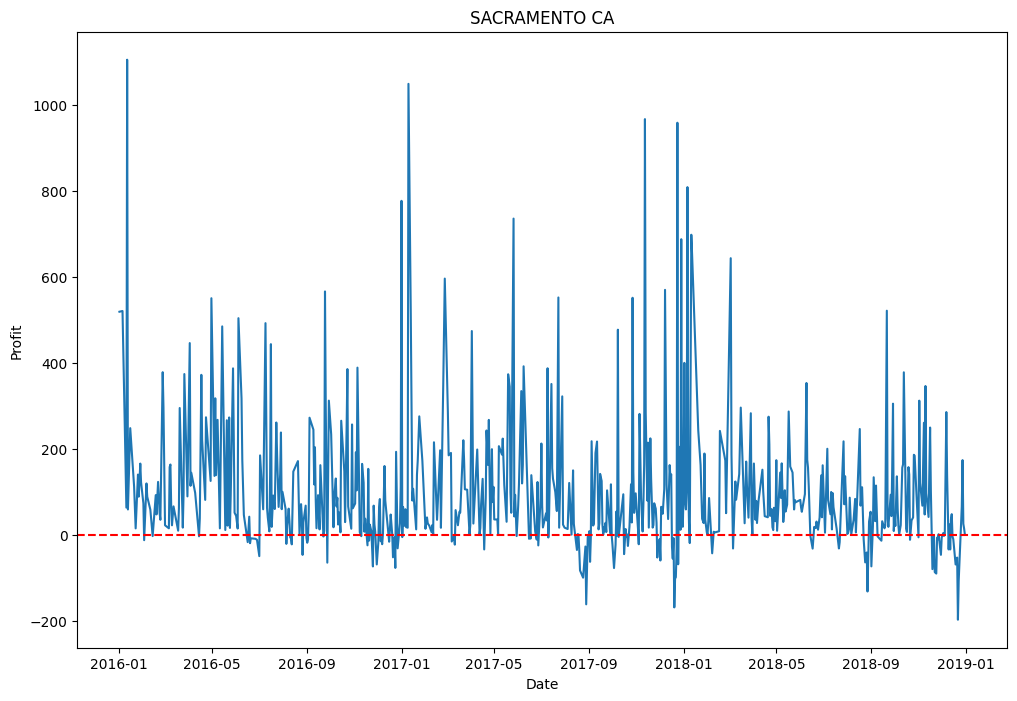

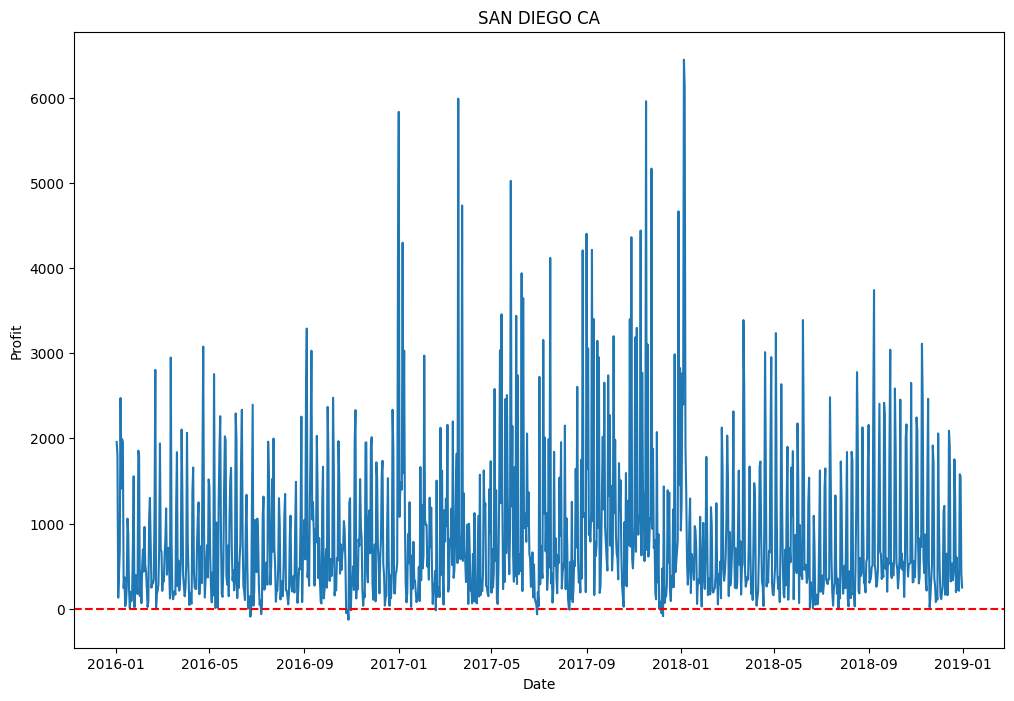

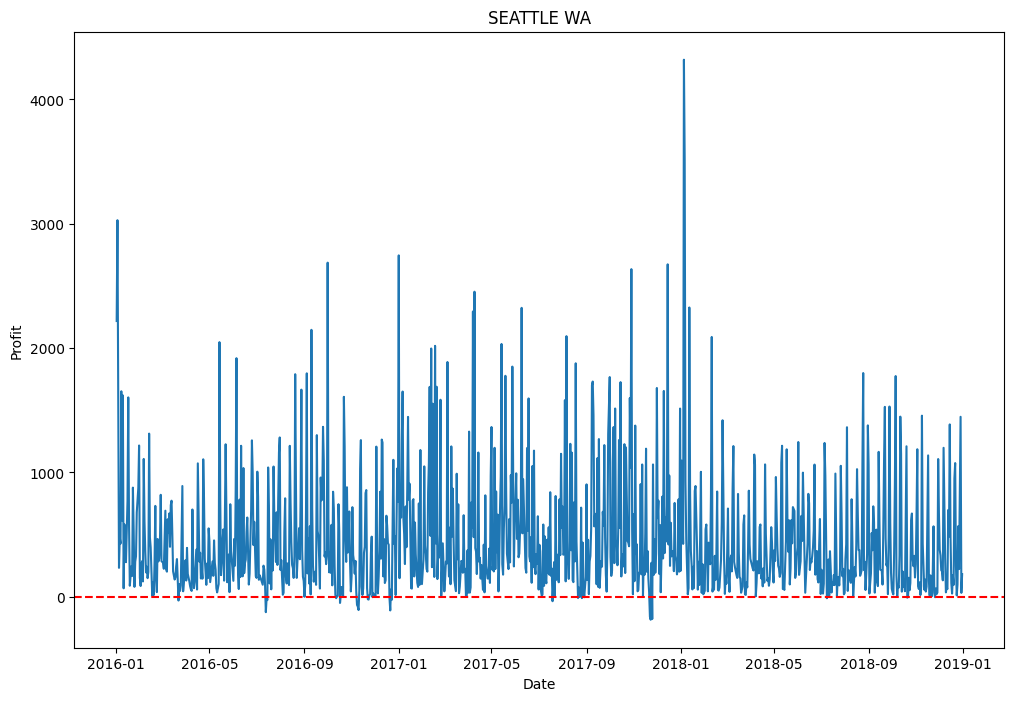

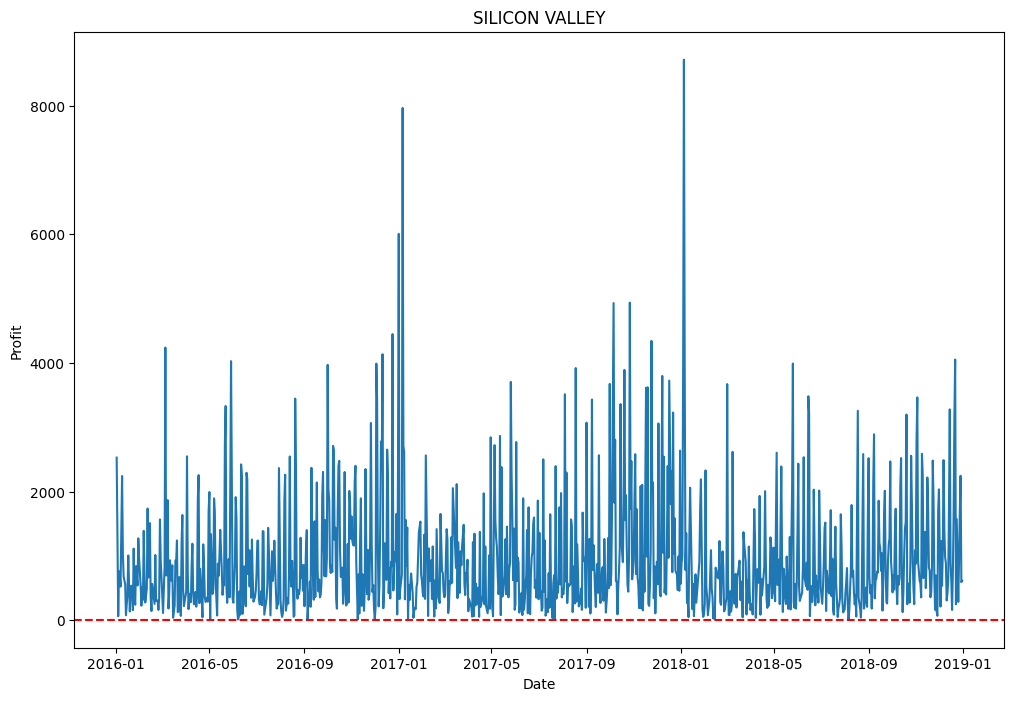

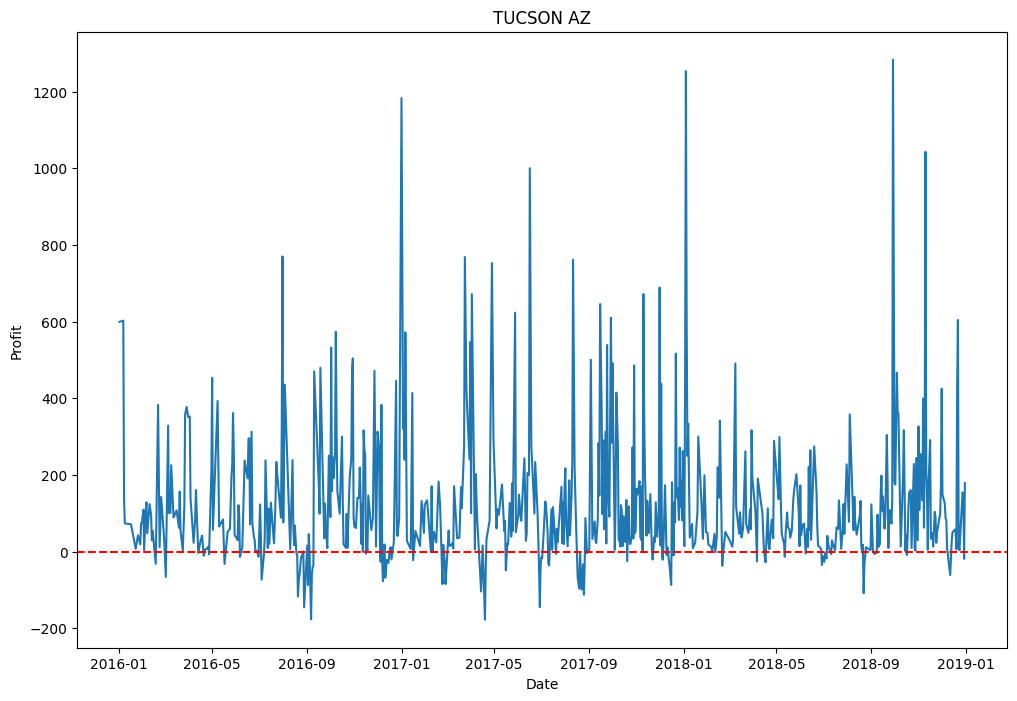

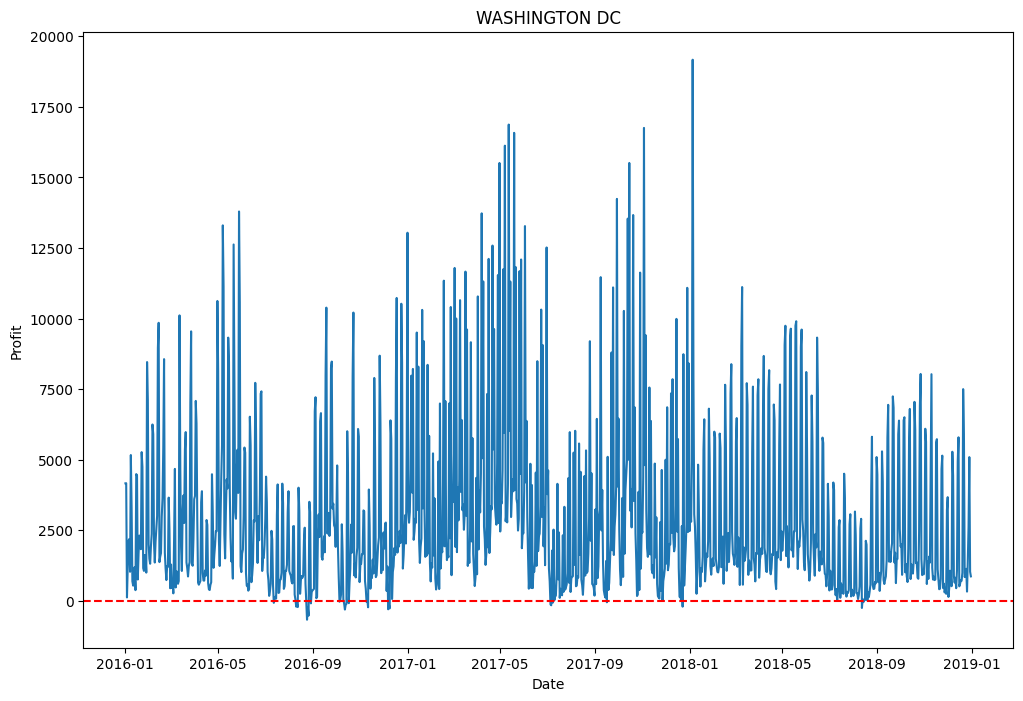

In [52]:
for i in city:
    plt.figure(figsize=(12,8))
    plt.plot(dict_cities[i].groupby(['Date'])['Profit'].sum())
    plt.axhline(y=0, color='red', linestyle=('--'))
    plt.title(i)
    plt.ylabel('Profit')
    plt.xlabel('Date')

Text(0.5, 1.0, 'Transaction_YellowCab')

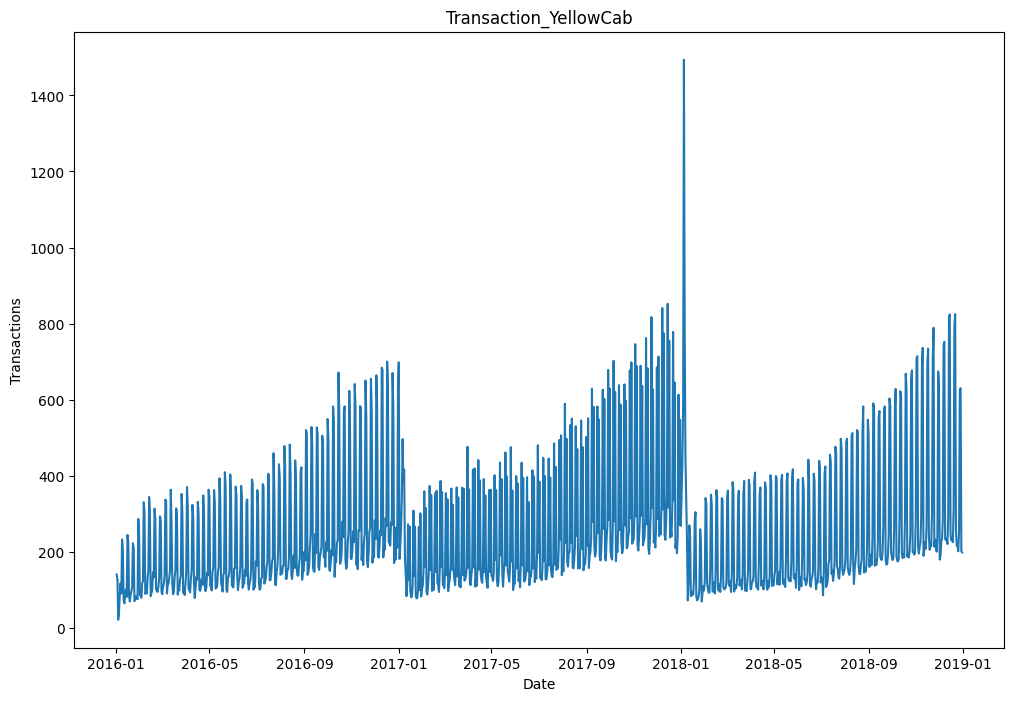

In [48]:
plt.figure(figsize=(12,8))
plt.plot(df_yellowcab.groupby(['Date'])['Transaction ID'].count())
plt.ylabel('Transactions')
plt.xlabel('Date')
plt.title('Transaction_YellowCab')

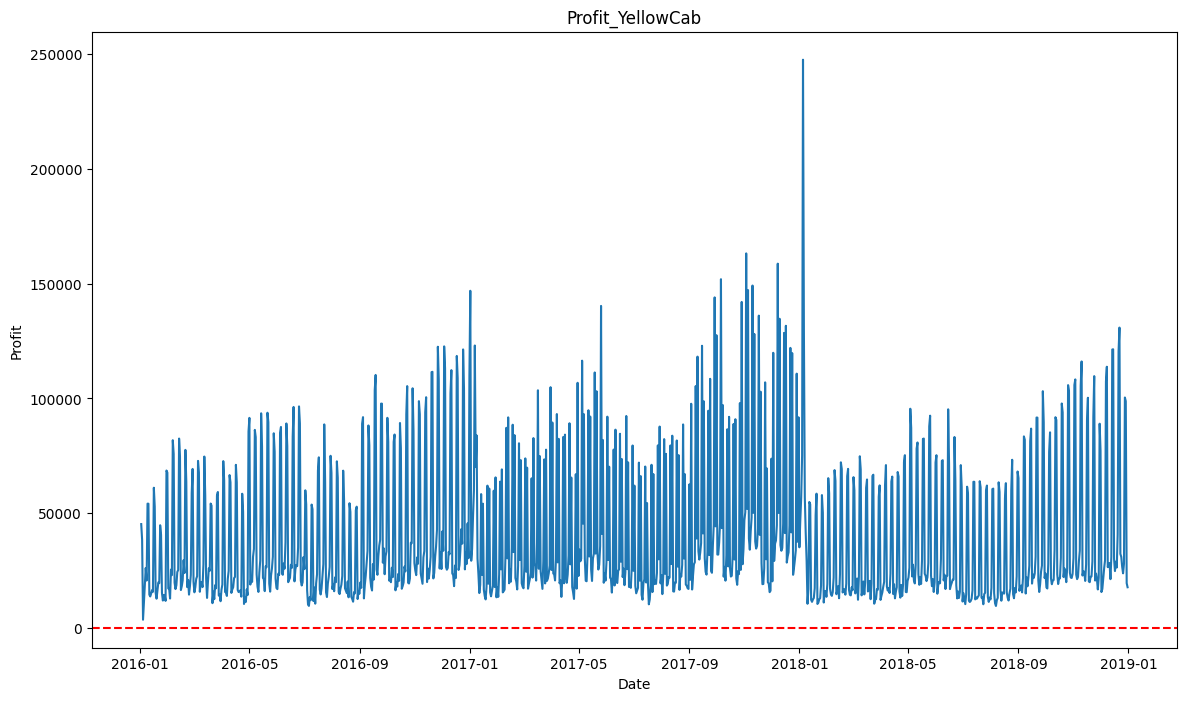

In [51]:
plt.figure(figsize=(14,8))
plt.plot(df_yellowcab.groupby(['Date'])['Profit'].sum())
plt.ylabel('Profit')
plt.xlabel('Date')
plt.title('Profit_YellowCab')
plt.axhline(y=0, color='red', linestyle=('--'))